# Gramener case study
Objective -  to understand the driving factors (or driver variables) behind loan default

# Section1 - Data Preparation

Importing all the modules & reading loan.csv

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [3]:
#reading the csv file
loan_df = pd.read_csv('loan.csv', low_memory= False)

In [4]:
#exploring the csv file 
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#checking the dimention of the dataframe.. 
loan_df.shape

(39717, 111)

Checking column-wise null value %

In [6]:
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

In [7]:
#exporing the null column percentage for each variable
#load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False).head()
#load_df_null_percentage

Dropping all columns with 100% null values

In [8]:
load_df_null_percentage_df = pd.DataFrame({'count': load_df_null_percentage}).reset_index()
print(load_df_null_percentage_df)

                           index  count
0     total_il_high_credit_limit  100.0
1           mo_sin_old_rev_tl_op  100.0
2                        bc_util  100.0
3                 bc_open_to_buy  100.0
4                    avg_cur_bal  100.0
5           acc_open_past_24mths  100.0
6                   inq_last_12m  100.0
7                    total_cu_tl  100.0
8                         inq_fi  100.0
9               total_rev_hi_lim  100.0
10                      all_util  100.0
11                    max_bal_bc  100.0
12                   open_rv_24m  100.0
13                   open_rv_12m  100.0
14                       il_util  100.0
15                  total_bal_il  100.0
16            mths_since_rcnt_il  100.0
17                   open_il_24m  100.0
18                   open_il_12m  100.0
19                    open_il_6m  100.0
20                   open_acc_6m  100.0
21                   tot_cur_bal  100.0
22                  tot_coll_amt  100.0
23                total_bc_limit  100.0


In [9]:
load_df_null_percentage_df.loc[load_df_null_percentage_df['count'] == 100.0, :]['index'].apply(lambda x : loan_df.drop([x],axis = 1, inplace = True))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
52    None
53    None
Name: index, dtype: object

In [10]:
#shape after droping the 100% null column..
loan_df.shape

(39717, 57)

# <h3> Checking % of nulls values for each column

In [11]:
#exporing the null column percentage for each feature..
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

next_pymnt_d              97.1297
mths_since_last_record    92.9854
mths_since_last_delinq    64.6625
desc                      32.5805
emp_title                  6.1913
dtype: float64

# <h3>Missing value fields - Since the fields "next_pymnt_d", "mths_since_last_record", "mths_since_last_delinq" have high null % - Droping these fields

In [12]:
loan_df.drop(['next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record'],inplace = True, axis = 1)

In [13]:
#checking the null value percentage for the current column.. 
#exporing the null column percentage for each feature..
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

desc                    32.5805
emp_title                6.1913
emp_length               2.7066
pub_rec_bankruptcies     1.7549
last_pymnt_d             0.1788
dtype: float64

In [14]:
#droping the columns desc,  emp_title, title
loan_df.drop(['desc', 'emp_title', 'title'], inplace = True, axis = 1)


In [15]:
#checking the null value percentage for the current column.. 
#exploring the null column percentage for each feature..
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

emp_length                    2.7066
pub_rec_bankruptcies          1.7549
last_pymnt_d                  0.1788
chargeoff_within_12_mths      0.1410
collections_12_mths_ex_med    0.1410
dtype: float64

In [16]:
#removing the record having emp_length is null.
print("shape before = ", loan_df.shape)
loan_df = loan_df[~loan_df.emp_length.isnull()]
print("shape after = ", loan_df.shape)

shape before =  (39717, 51)
shape after =  (38642, 51)


In [17]:
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

pub_rec_bankruptcies          1.8037
last_pymnt_d                  0.1708
chargeoff_within_12_mths      0.1449
collections_12_mths_ex_med    0.1449
revol_util                    0.1216
dtype: float64

In [18]:
loan_df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [19]:
#imputing 0 in place of having nan for column pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.fillna(0, inplace = True)
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

last_pymnt_d                  0.1708
chargeoff_within_12_mths      0.1449
collections_12_mths_ex_med    0.1449
revol_util                    0.1216
tax_liens                     0.1009
dtype: float64

In [20]:
loan_df.last_pymnt_d.unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [21]:
print(loan_df.chargeoff_within_12_mths.unique())
#there is only zero and NA so we can drop the columns. 
loan_df.drop(['chargeoff_within_12_mths'], axis = 1, inplace= True)
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

[ 0. nan]


last_pymnt_d                  0.1708
collections_12_mths_ex_med    0.1449
revol_util                    0.1216
tax_liens                     0.1009
last_credit_pull_d            0.0052
dtype: float64

In [22]:
print(loan_df.collections_12_mths_ex_med.unique())
#there is only zero and NA so we can drop the columns. 
loan_df.drop(['collections_12_mths_ex_med'], axis = 1, inplace= True)
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

[ 0. nan]


last_pymnt_d          0.1708
revol_util            0.1216
tax_liens             0.1009
last_credit_pull_d    0.0052
home_ownership        0.0000
dtype: float64

In [23]:
loan_df.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [24]:
loan_df.tax_liens.unique()

array([ 0., nan])

In [25]:
#droping the tax_liens feature as well since all the values are 0 or nan
loan_df.drop(['tax_liens'], axis = 1, inplace= True)
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

last_pymnt_d            0.1708
revol_util              0.1216
last_credit_pull_d      0.0052
pub_rec_bankruptcies    0.0000
home_ownership          0.0000
dtype: float64

In [26]:
loan_df.last_credit_pull_d.unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

In [27]:
loan_df.shape

(38642, 48)

Thus post treatment for all null values we are left with 48 columns for analysis & 38,642 rows for analysis

# <h3> Describing all the column summary stat. </h3>

In [28]:
#checking all the columns decriptive stastics.. 
loan_df_desc = loan_df.describe().T
loan_df_desc.reset_index(inplace=True)
loan_df_desc

,index,count,mean,std,min,25%,50%,75%,max
0,id,38642.0,681040.355391,211304.549803,54734.00,513435.000000,662770.50000,8.364912e+05,1.077501e+06
1,member_id,38642.0,847659.278402,266779.590478,70699.00,662863.250000,847409.00000,1.045642e+06,1.314167e+06
2,loan_amnt,38642.0,11291.615988,7462.136215,500.00,5500.000000,10000.00000,1.500000e+04,3.500000e+04
3,funded_amnt,38642.0,11017.101211,7193.038828,500.00,5500.000000,9950.00000,1.500000e+04,3.500000e+04
4,funded_amnt_inv,38642.0,10455.452667,7139.613641,0.00,5000.000000,9000.00000,1.442500e+04,3.500000e+04
5,installment,38642.0,326.760477,209.143908,15.69,168.442500,282.83000,4.343975e+02,1.305190e+03
6,annual_inc,38642.0,69608.277211,64253.202240,4000.00,41400.000000,60000.00000,8.319999e+04,6.000000e+06
7,dti,38642.0,13.325108,6.666902,0.00,8.200000,13.41500,1.859000e+01,2.999000e+01
8,delinq_2yrs,38642.0,0.146887,0.492543,0.00,0.000000,0.00000,0.000000e+00,1.100000e+01
9,inq_last_6mths,38642.0,0.870141,1.069834,0.00,0.000000,1.00000,1.000000e+00,8.000000e+00


<h4><I> Observation </I>: Some columns having zero mean and std. deviation 

In [29]:
#finding all the columns having zero means and std..
loan_df_desc.loc[(loan_df_desc['mean'] == 0.0) & (loan_df_desc['std'] == 0.0), :]

,index,count,mean,std,min,25%,50%,75%,max
25,acc_now_delinq,38642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,delinq_amnt,38642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#checking the unique values for all above the columns 
print(loan_df.acc_now_delinq.unique())
print(loan_df.delinq_amnt.unique())

[0]
[0]


The columns "acc_now_delinq", "delinq_amnt" have all values as 0 thus dropping this.

In [31]:
#droping all the columns having zero mean and std... 
loan_df.drop(['acc_now_delinq', 'delinq_amnt'], axis=1, inplace=True)

In [32]:
loan_df.shape

(38642, 46)

In [33]:
load_df_null_percentage = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 4).sort_values(ascending = False)
load_df_null_percentage.head()

last_pymnt_d            0.1708
revol_util              0.1216
last_credit_pull_d      0.0052
pub_rec_bankruptcies    0.0000
emp_length              0.0000
dtype: float64

In [34]:
len(loan_df.revol_util.unique())

1088

In [35]:
#deleting the rows having null for last_pymnt_d,  revol_util, last_credit_pull_d
loan_df = loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df = loan_df[~loan_df.revol_util.isnull()]
loan_df = loan_df[~loan_df.last_credit_pull_d.isnull()]
loan_df.shape

(38531, 46)

Thus after cleaning the dataset for (1) all null/zero values, the size is now 38,531 rows and 46 columns

Creating a csv for study from the cleaned dataframe

In [36]:
loan_df.to_csv('loan_clean_1.csv', index = False)

# Section 2 : Variable analysis (Univariate & Bivariate)

In [37]:
#reading the data from csv
loan_df = pd.read_csv('loan_clean_1.csv', low_memory= False)
loan_df.shape

(38531, 46)

Examining the "Loan status" variable

In [38]:
loan_df.groupby(["loan_status"])["id"].count()

loan_status
Charged Off     5321
Current         1098
Fully Paid     32112
Name: id, dtype: int64

To identify the drivers for default ("Charged off"), we are considering only loans with status 'Charged Off' & 'Fully Paid'. The outcome for loans tagged as 'Current' is not known and hence isnt considered for this analysis.

In [39]:
loan_df = loan_df.loc[(loan_df.loan_status == 'Charged Off') | (loan_df.loan_status == 'Fully Paid')]

In [40]:
loan_df.shape

(37433, 46)

In [41]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [42]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0.0


Creating derived variable 'loan status default' = 1 if charged off or else 0

In [43]:
loan_df['loan_status_default'] = np.where(loan_df['loan_status'] == 'Charged Off',1,0)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,loan_status_default
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,1,INDIVIDUAL,0.0,0


<h3> Variable : loan_amnt </h3>

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [44]:
loan_df['loan_amnt'].describe()

count    37433.000000
mean     11131.332648
std       7352.376591
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Ploting the box plot to check the spread of loan amount

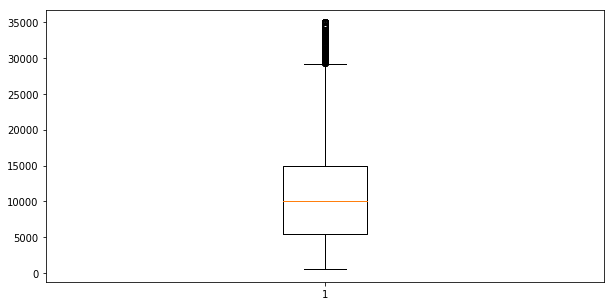

In [45]:
plt.figure(figsize=(10, 5))
plt.boxplot(loan_df['loan_amnt'])
#plt.yscale('log')
plt.show()

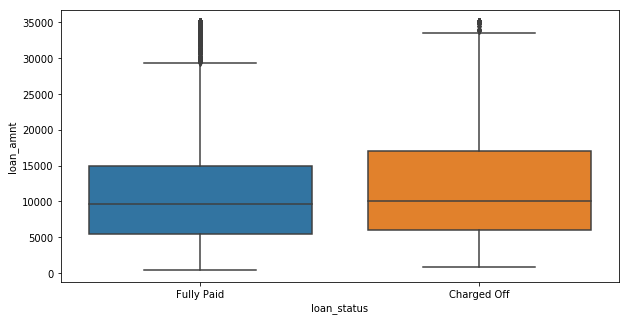

In [46]:
#ploting the box plot for diff type of loan status
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_df)
plt.show()

Loan amount Vs Default - Since loan amount is a continuos variable, creating bins based on summary stats to understand the % loan cases that defaulted by individual bins

In [47]:
loan_df['loan_amnt'].describe()

count    37433.000000
mean     11131.332648
std       7352.376591
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

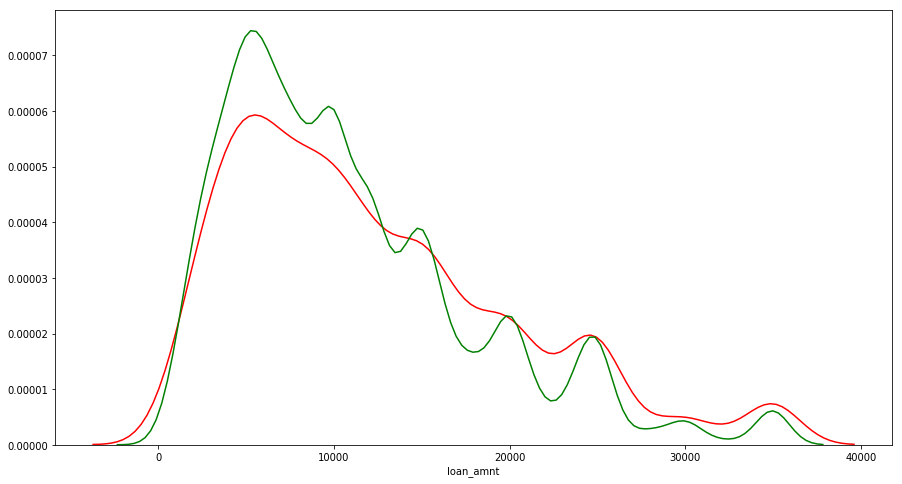

In [48]:
#ploting the distribution plot. for both Charged Off and Fully Paid
plt.figure(figsize=(15,8))
sns.distplot(loan_df.loc[loan_df.loan_status == 'Charged Off']['loan_amnt'], hist = False, color= 'red')
sns.distplot(loan_df.loc[loan_df.loan_status == 'Fully Paid']['loan_amnt'], hist = False, color = 'green')
plt.show()

# higher the loan amount higher the charged off count..

# <h3>Variable : funded_amnt

The total amount committed to that loan at that point in time.

In [49]:
loan_df['funded_amnt'].describe()

count    37433.000000
mean     10864.775065
std       7094.189494
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

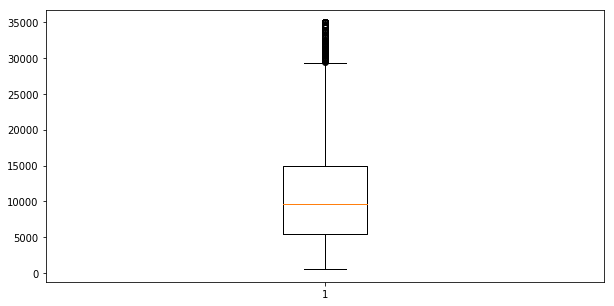

In [50]:
#ploting the box plot to check the spread 
plt.figure(figsize=(10, 5))
plt.boxplot(loan_df['funded_amnt'])
plt.show()
# distribution seems similar to 'Loan amount'

In [51]:
loan_df.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,loan_status_default
id,1.000000,0.993497,0.124778,0.135446,0.237387,0.079339,0.008886,0.090940,-0.008027,-0.040925,...,0.200149,0.096603,0.126856,-0.055858,0.039706,-0.010225,0.145120,NaN,-0.001478,0.042038
member_id,0.993497,1.000000,0.124870,0.134777,0.247514,0.074455,0.010012,0.092297,-0.007430,-0.045919,...,0.210946,0.097735,0.130518,-0.058524,0.037489,-0.012159,0.145564,NaN,-0.000562,0.039261
loan_amnt,0.124778,0.124870,1.000000,0.981541,0.936988,0.931524,0.266033,0.061004,-0.033552,0.012632,...,0.847863,0.846804,0.728084,0.047055,0.142827,0.076561,0.473692,NaN,-0.030647,0.064859
funded_amnt,0.135446,0.134777,0.981541,1.000000,0.955504,0.957643,0.261716,0.060870,-0.033653,0.012633,...,0.865098,0.865473,0.736489,0.049375,0.143366,0.078250,0.477732,NaN,-0.031639,0.061575
funded_amnt_inv,0.237387,0.247514,0.936988,0.955504,1.000000,0.904212,0.249018,0.069597,-0.039930,-0.002958,...,0.910091,0.838723,0.725932,0.028922,0.131350,0.064097,0.468143,NaN,-0.032540,0.042688
installment,0.079339,0.074455,0.931524,0.957643,0.904212,1.000000,0.264435,0.050434,-0.021533,0.010859,...,0.817605,0.848956,0.641403,0.057875,0.121227,0.077021,0.412236,NaN,-0.028766,0.031542
annual_inc,0.008886,0.010012,0.266033,0.261716,0.249018,0.264435,1.000000,-0.123811,0.021388,0.036237,...,0.241921,0.253371,0.182367,0.006303,0.022401,0.016222,0.140994,NaN,-0.012159,-0.037097
dti,0.090940,0.092297,0.061004,0.060870,0.069597,0.050434,-0.123811,1.000000,-0.034462,0.000137,...,0.065457,0.035607,0.102600,-0.011922,0.025321,0.010767,0.008819,NaN,0.007789,0.043984
delinq_2yrs,-0.008027,-0.007430,-0.033552,-0.033653,-0.039930,-0.021533,0.021388,-0.034462,1.000000,0.007897,...,-0.030930,-0.039715,0.022685,0.029085,0.012179,0.013870,-0.013276,NaN,0.004557,0.018326
inq_last_6mths,-0.040925,-0.045919,0.012632,0.012633,-0.002958,0.010859,0.036237,0.000137,0.007897,1.000000,...,-0.017974,-0.020410,0.026813,0.030900,0.017856,0.011791,0.028447,NaN,0.013517,0.069580


From the correlation matrix we can see that 'loan_amnt' is highly correlated to 'funded_amnt'. Hence removing 'funded_amnt' from our variables

In [52]:
loan_df.drop(['funded_amnt'], inplace = True, axis = 1)
loan_df.shape

(37433, 46)

<h2> 'funded_amnt_inv' </h2>

The total amount committed by investors for that loan at that point in time. This variable seems to be same as loan / funded amount.

In [53]:
loan_df['funded_amnt_inv'].describe()

count    37433.000000
mean     10293.812458
std       7033.721291
min          0.000000
25%       5000.000000
50%       8875.000000
75%      14116.966100
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [54]:
loan_df[['loan_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt_inv
loan_amnt,1.000000,0.936988
funded_amnt_inv,0.936988,1.000000


As the corelation between these two column is high. It is enough if we keep 'Loan amount'. Deleting funded_amnt_inv

In [55]:
loan_df.drop(['funded_amnt_inv'], inplace = True, axis = 1)
loan_df.shape

(37433, 45)

<h2> 'term' </h3>

Term of the loan

In [56]:
loan_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

Generating "count" = total count of loans "sum" = Number of defaults


In [57]:
term_def = loan_df.groupby('term')["loan_status_default"].agg(['count','sum'])
term_def["%_distribution"] = 100*term_def["count"].div(len(loan_df))
term_def["%_default"] = 100*term_def["sum"].div(term_def["count"])
term_def.reset_index(inplace = True)
term_def

,term,count,sum,%_distribution,%_default
0,36 months,28194,3013,75.318569,10.686671
1,60 months,9239,2308,24.681431,24.981059


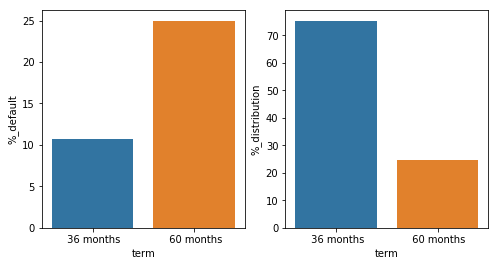

In [58]:
#ploting the bar graph for 
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.barplot(x = 'term', y = '%_default', data = term_def)
plt.subplot(1, 2, 2)
sns.barplot(x = 'term', y = '%_distribution', data = term_def)

# i. overall % of loan higher in '36 months' term
# ii. % of charged off loan is higher for 60 month..

# <h3>'int_rate' - Interest Rate on the loan

In [59]:
loan_df['int_rate_round'] = loan_df.int_rate.apply(lambda x : int(round(float(x[0:len(x)-1]))))
loan_df['int_rate_round'].describe()

count    37433.000000
mean        11.947025
std          3.674169
min          5.000000
25%          9.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: int_rate_round, dtype: float64

In [60]:
loan_df.int_rate_round.unique()

array([11, 15, 16, 13,  8, 19, 21, 10,  6, 12, 17,  9, 18,  7, 20, 14, 22,
       24, 23,  5])

In [61]:
#Generating "count" = total count of loans "sum" = Number of defaults
int_rate_round_def = loan_df.groupby('int_rate_round')["loan_status_default"].agg(['count','sum'])
int_rate_round_def["%_distribution"] = 100*int_rate_round_def["count"].div(len(loan_df))
int_rate_round_def["%_default"] = 100*int_rate_round_def["sum"].div(int_rate_round_def["count"])
int_rate_round_def


,count,sum,%_distribution,%_default
int_rate_round,,,,
5,524,14,1.399834,2.671756
6,1439,46,3.844202,3.196664
7,3145,170,8.401678,5.405405
8,3254,217,8.692865,6.668715
9,1469,116,3.924345,7.896528
10,3278,336,8.756979,10.250153
11,4821,573,12.879010,11.885501
12,3045,454,8.134534,14.909688
13,4507,691,12.040178,15.331706


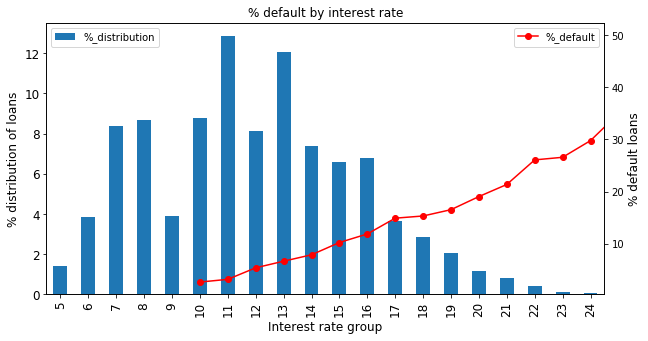

In [62]:
ax = int_rate_round_def[['%_distribution']].plot(kind='bar', title ="% default by interest rate", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Interest rate group", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = int_rate_round_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# Higher default % observed with higher interest rate.

<h2>installment</h2>

The monthly payment owed by the borrower if the loan originates.

In [63]:
loan_df['installment'].describe()

count    37433.000000
mean       324.951288
std        208.851918
min         15.690000
25%        167.570000
50%        280.610000
75%        429.450000
max       1305.190000
Name: installment, dtype: float64

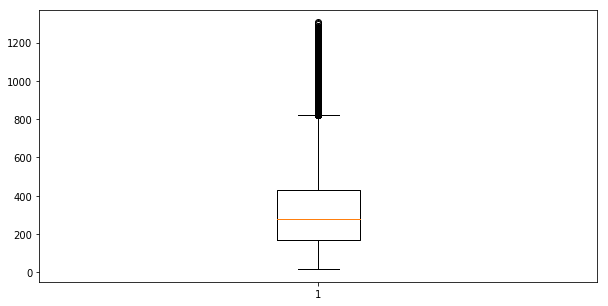

In [64]:
#overall box plot. 

plt.figure(figsize=(10, 5))
plt.boxplot(loan_df['installment'])
plt.show()

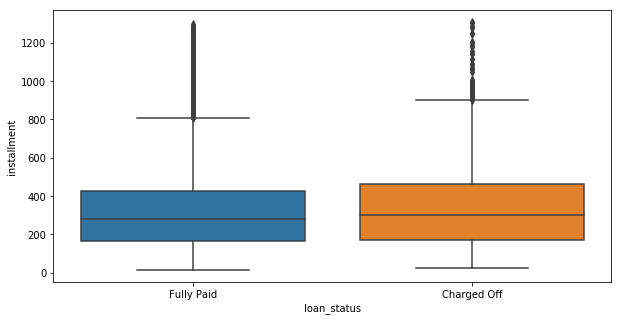

In [65]:
#box plot for different loan_status
plt.figure(figsize= (10, 5))
sns.boxplot(x = 'loan_status', y = 'installment', data = loan_df )

In [66]:
loan_df[['loan_amnt','installment']].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.931524
installment,0.931524,1.000000


# High correlation observed between wtih loan amount and installment .

<h2> emp_length </h2>

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [67]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [68]:
loan_df_emp_length_count = pd.DataFrame({'count':loan_df.groupby(['emp_length'])['id'].count()})
loan_df_emp_length_count.reset_index(inplace=True)
loan_df['emp_length'].replace({'10+ years': '>10 years', '< 1 year': '0-1 year'}, inplace=True)

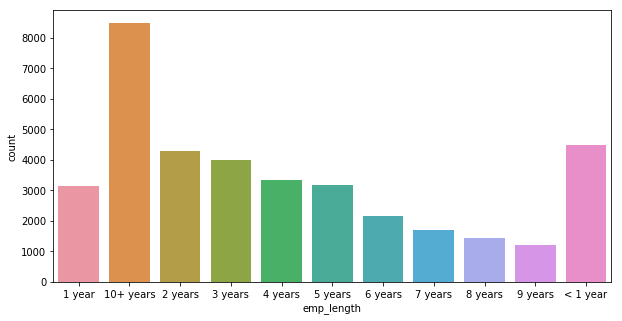

In [69]:
#ploting the loan count distribution among the yrs of exp
plt.figure(figsize=(10,5))
sns.barplot(x = 'emp_length', y = 'count', data = loan_df_emp_length_count)

# Max number of loan was given to >10 yrs experience. 

In [70]:
loan_df_emp_length_count.head(20)

,emp_length,count
0,1 year,3154
1,10+ years,8478
2,2 years,4280
3,3 years,4001
4,4 years,3328
5,5 years,3180
6,6 years,2164
7,7 years,1707
8,8 years,1430
9,9 years,1223


In [71]:
#Generating "count" = total count of loans "sum" = Number of defaults
emp_length_def = loan_df.groupby('emp_length')["loan_status_default"].agg(['count','sum'])
emp_length_def["%_distribution"] = 100*emp_length_def["count"].div(len(loan_df))
emp_length_def["%_default"] = 100*emp_length_def["sum"].div(emp_length_def["count"])
emp_length_def

,count,sum,%_distribution,%_default
emp_length,,,,
0-1 year,4488,628,11.989421,13.992870
1 year,3154,444,8.425721,14.077362
2 years,4280,560,11.433762,13.084112
3 years,4001,548,10.688430,13.696576
4 years,3328,453,8.890551,13.611779
5 years,3180,447,8.495178,14.056604
6 years,2164,304,5.780995,14.048059
7 years,1707,262,4.560147,15.348565
8 years,1430,199,3.820159,13.916084


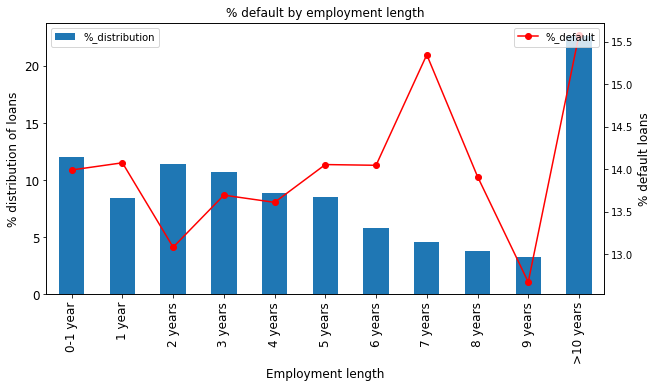

In [72]:
#Plotting
ax = emp_length_def[['%_distribution']].plot(kind='bar', title ="% default by employment length", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Employment length", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = emp_length_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# There is no definitive pattern for the default and hence this variable is not considered as a driver

In [73]:
loan_df.drop(['emp_length'], inplace = True, axis = 1)
loan_df.shape

(37433, 45)

<h2> home_ownership </h2>

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [74]:
loan_df.groupby(["home_ownership"])["id"].count()

home_ownership
MORTGAGE    16572
NONE            3
OTHER          96
OWN          2762
RENT        18000
Name: id, dtype: int64

In [75]:
#Generating "count" = total count of loans "sum" = Number of defaults
home_ownership_def = loan_df.groupby('home_ownership')["loan_status_default"].agg(['count','sum'])
home_ownership_def["%_distribution"] = round(100*home_ownership_def["count"].div(len(loan_df)), 2)
home_ownership_def["%_default"] = round(100*home_ownership_def["sum"].div(home_ownership_def["count"]), 2)
home_ownership_def.reset_index(inplace = True)
home_ownership_def

,home_ownership,count,sum,%_distribution,%_default
0,MORTGAGE,16572,2229,44.27,13.45
1,NONE,3,0,0.01,0.00
2,OTHER,96,18,0.26,18.75
3,OWN,2762,395,7.38,14.30
4,RENT,18000,2679,48.09,14.88


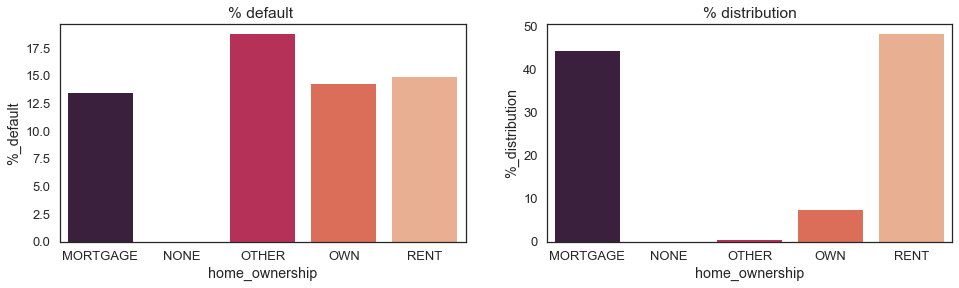

In [76]:
#Plotting
plt.figure(figsize=(16,4))
sns.set(style="white", context="talk")
plt.subplot(1, 2, 1)
p = sns.barplot(palette="rocket", x = 'home_ownership', y = '%_default', data = home_ownership_def)
plt.title('% default ')

plt.subplot(1, 2, 2)
p = sns.barplot(palette="rocket", x = 'home_ownership', y = '%_distribution', data = home_ownership_def)
plt.title('% distribution')

plt.show()

'Mortgage' & 'Rent' are the most popular loan types and there is no significant different between the two in terms of % default, hence not a driver. Dropping the variable.

In [77]:
loan_df.drop(['home_ownership'], inplace = True, axis = 1)
loan_df.shape

(37433, 44)

# <h3>'Grade' and 'Subgrade'

Grade & subgrades assigned by the company for the loan

Looking at various values withing the 2 columns as there seems to be some connection between the two

In [78]:
loan_df_grp = pd.DataFrame({'count': loan_df.groupby(['grade', 'sub_grade', 'loan_status'])['id'].count()}).reset_index()
loan_df_grp['total_count'] = loan_df_grp.sub_grade.apply(lambda x : loan_df_grp.loc[loan_df_grp.sub_grade == x]['count'].sum())
loan_df_grp['percentage'] = round(100 * loan_df_grp['count']/loan_df_grp['total_count'], 2)
loan_df_grp

,grade,sub_grade,loan_status,count,total_count,percentage
0,A,A1,Charged Off,24,1051,2.28
1,A,A1,Fully Paid,1027,1051,97.72
2,A,A2,Charged Off,67,1440,4.65
3,A,A2,Fully Paid,1373,1440,95.35
4,A,A3,Charged Off,89,1740,5.11
5,A,A3,Fully Paid,1651,1740,94.89
6,A,A4,Charged Off,168,2792,6.02
7,A,A4,Fully Paid,2624,2792,93.98
8,A,A5,Charged Off,204,2630,7.76
9,A,A5,Fully Paid,2426,2630,92.24


In [79]:
#Generating "count" = total count of loans "sum" = Number of defaults
grade_def = loan_df.groupby(['grade', 'sub_grade'])["loan_status_default"].agg(['count','sum'])
grade_def["%_distribution"] = 100*grade_def["count"].div(len(loan_df))
grade_def["%_default"] = 100*grade_def["sum"].div(grade_def["count"])
grade_def

count  sum  %_distribution  %_default
grade sub_grade                                       
A     A1          1051   24        2.807683   2.283539
      A2          1440   67        3.846873   4.652778
      A3          1740   89        4.648305   5.114943
      A4          2792  168        7.458659   6.017192
      A5          2630  204        7.025886   7.756654
B     B1          1720  152        4.594876   8.837209
      B2          1943  210        5.190607  10.808029
      B3          2744  324        7.330430  11.807580
      B4          2381  312        6.360698  13.103738
      B5          2557  344        6.830871  13.453266
C     C1          2009  317        5.366922  15.778995
      C2          1889  299        5.046349  15.828481
      C3          1450  253        3.873587  17.448276
      C4          1171  199        3.128256  16.994022
      C5          1116  195        2.981327  17.473118
D     D1           908  159        2.425667  17.511013
      D2          1249  257        3.336628  20.576461
      D3          1084  246        2.895841  22.693727
      D4           900  205        2.404296  22.777778
      D5           809  202        2.161195  24.969098
E     E1           711  193        1.899394  27.144866
      E2           598  155        1.597521  25.919732
      E3           499  113        1.333048  22.645291
      E4           418  123        1.116662  29.425837
      E5           376  105        1.004461  27.925532
F     F1           300   89        0.801432  29.666667
      F2           226   66        0.603745  29.203540
      F3           172   50        0.459488  29.069767
      F4           146   52        0.390030  35.616438
      F5           110   53        0.293858  48.181818
G     G1            90   27        0.240430  30.000000
      G2            76   27        0.203029  35.526316
      G3            45   19        0.120215  42.222222
      G4            54   13        0.144258  24.074074
      G5            29   10        0.077472  34.482759

Thus the 'Sub-Grade' is a granular version of 'Grade' and hence removing grade and keeping subgrade

In [80]:
loan_df.drop(['grade'], inplace = True, axis = 1)
loan_df.shape

(37433, 43)

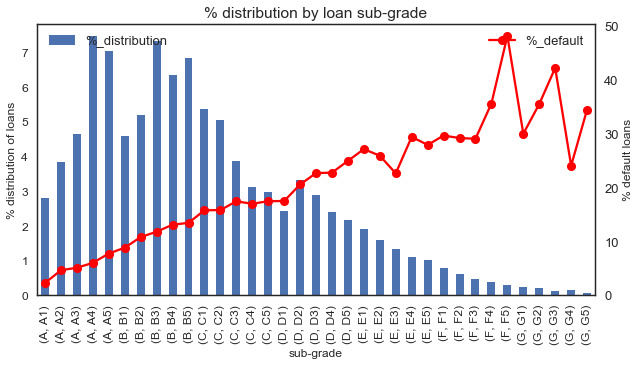

In [81]:
#Plotting
ax = grade_def[['%_distribution']].plot(kind='bar', title ="% distribution by loan sub-grade", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("sub-grade", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = grade_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# Clearly, from the above chart, loan subgrade is a very good driver for default 

<h2> member_id </h2>

A unique LC assigned Id for the borrower member. Since it is an id, hence not a driver. Thus removing

In [82]:
loan_df.drop(['member_id'], inplace = True, axis = 1)
loan_df.shape

(37433, 42)

<I><b> Observations: </b> every member has one to mapping with loanid.  

<h1> Annual income </h1>

The self-reported annual income provided by the borrower during registration.

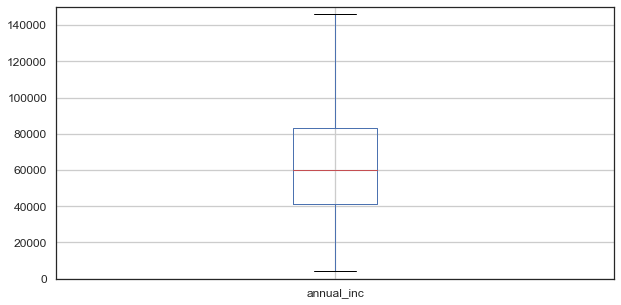

In [83]:
#plotting box plot
axes = loan_df.boxplot(column='annual_inc',figsize=(10, 5),fontsize=12)
axes.set_ylim(ymax=150000,ymin =0)
plt.show()

In [84]:
loan_df['annual_inc'].describe()

count    3.743300e+04
mean     6.946732e+04
std      6.471331e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [85]:
# creating bins for annual income
loan_df['annual_inc_group'] = pd.cut(loan_df.annual_inc,bins=[4000, 41000, 60000, 8.300000e+04, 6.000000e+06],labels=["(q1)4k-41k", "(q2)41k-60k", "(q3)60k-83k", "(q4)>83k"])

In [86]:
loan_df['annual_inc_group'].head()

0     (q1)4k-41k
1     (q1)4k-41k
2     (q1)4k-41k
3    (q2)41k-60k
5     (q1)4k-41k
Name: annual_inc_group, dtype: category
Categories (4, object): [(q1)4k-41k < (q2)41k-60k < (q3)60k-83k < (q4)>83k]

In [87]:
#Generating "count" = total count of loans "sum" = Number of defaults
loan_df['loan_amnt_group'] = pd.cut(loan_df.loan_amnt,bins=[500, 5500, 10000, 15000, 35000],labels=["(q1)500-5.5k", "(q2)5.5k-10k", "(q3)10k-15k", "(q4)>15k"])
annual_inc_def = loan_df.groupby('loan_amnt_group')["loan_status_default"].agg(['count','sum'])
annual_inc_def["%_distribution"] = 100*annual_inc_def["count"].div(len(loan_df))
annual_inc_def["%_default"] = 100*annual_inc_def["sum"].div(annual_inc_def["count"])
annual_inc_def

,count,sum,%_distribution,%_default
loan_amnt_group,,,,
(q1)500-5.5k,9523,1246,25.440120,13.084112
(q2)5.5k-10k,11885,1487,31.750060,12.511569
(q3)10k-15k,7546,1016,20.158684,13.464087
(q4)>15k,8474,1572,22.637779,18.550861


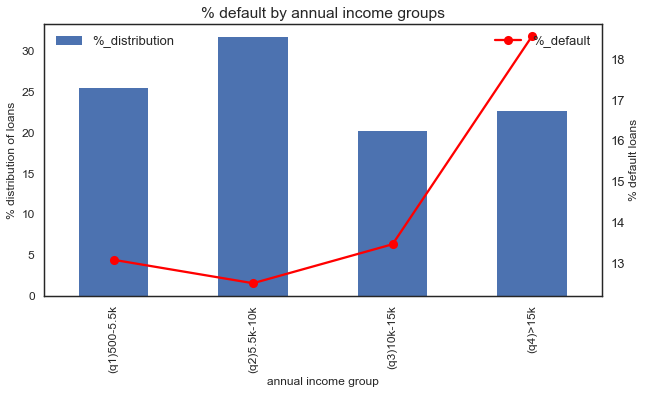

In [88]:
#Plotting
ax = annual_inc_def[['%_distribution']].plot(kind='bar', title ="% default by annual income groups", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("annual income group", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = annual_inc_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# %of default is higher as annual income increases 

# Verification Status

In [89]:
loan_df.groupby(["verification_status"])["id"].count()

verification_status
Not Verified       16216
Source Verified     9470
Verified           11747
Name: id, dtype: int64

In [90]:
#Generating "count" = total count of loans "sum" = Number of defaults
ver_status_def = loan_df.groupby('verification_status')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
ver_status_def["%_distribution"] = 100*ver_status_def["count"].div(len(loan_df))
ver_status_def["%_default"] = 100*ver_status_def["sum"].div(ver_status_def["count"])
ver_status_def

,count,sum,%_distribution,%_default
verification_status,,,,
Not Verified,16216,2009,43.320065,12.388999
Source Verified,9470,1380,25.298533,14.572334
Verified,11747,1932,31.381401,16.446752


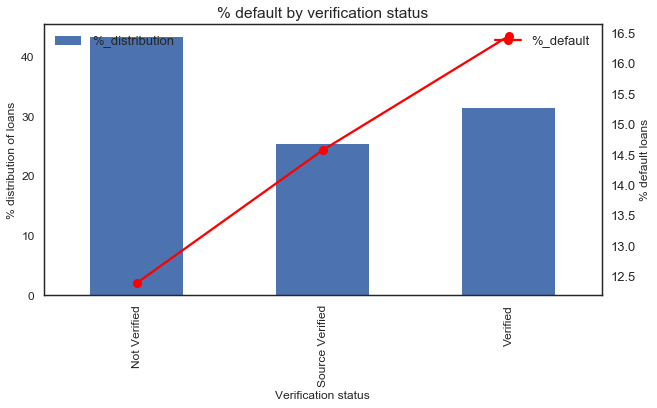

In [91]:
#Plotting
ax = ver_status_def[['%_distribution']].plot(kind='bar', title ="% default by verification status", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Verification status", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = ver_status_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# Surprisingly, Verfied loans have higher % of default

<h1> Issue_d </h1>

The month which the loan was funded

In [92]:
loan_df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [93]:
#deriving the two new feature from issue_date and issue_year..
loan_df['issue_month'] = loan_df.issue_d.apply(lambda x : x[0: x.index('-')])
loan_df['issue_year'] = loan_df.issue_d.apply(lambda x: int((x[x.index('-')+1: ])))

In [94]:
loan_df['issue_year'] = loan_df['issue_year'] + 2000
loan_df['issue_year'].unique()

array([2011, 2010, 2009, 2008, 2007])

In [95]:
#creating the data distributed % of fraud across the year. 
loan_year_df = pd.DataFrame({'count': loan_df.groupby(['issue_year','loan_status'])['id'].count()})
loan_year_df.reset_index(inplace= True)
loan_year_df['total_count'] = loan_year_df.issue_year.apply(lambda x : loan_df.loc[loan_df.issue_year == x]['id'].count())
loan_year_df['percentage'] = round(100*loan_year_df['count'] / loan_year_df['total_count'], 2)
loan_year_df.head(50)

,issue_year,loan_status,count,total_count,percentage
0,2007,Charged Off,45,250,18.00
1,2007,Fully Paid,205,250,82.00
2,2008,Charged Off,243,1554,15.64
3,2008,Fully Paid,1311,1554,84.36
4,2009,Charged Off,580,4691,12.36
5,2009,Fully Paid,4111,4691,87.64
6,2010,Charged Off,1389,11179,12.43
7,2010,Fully Paid,9790,11179,87.57
8,2011,Charged Off,3064,19759,15.51
9,2011,Fully Paid,16695,19759,84.49


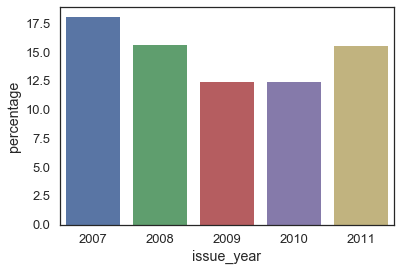

In [96]:
# plotting year wise % default percentage..
sns.barplot(x = 'issue_year', y = 'percentage', data = loan_year_df.loc[loan_year_df.loan_status == 'Charged Off'])

In [97]:
#creating the data distributed % of fraud across the year. 
loan_year_df = pd.DataFrame({'count': loan_df.groupby(['issue_month','loan_status'])['id'].count()})
loan_year_df.reset_index(inplace= True)
loan_year_df['total_count'] = loan_year_df.issue_month.apply(lambda x : loan_df.loc[loan_df.issue_month == x]['id'].count())
loan_year_df['percentage'] = round(100*loan_year_df['count'] / loan_year_df['total_count'], 2)
loan_year_df.head(50)

,issue_month,loan_status,count,total_count,percentage
0,Apr,Charged Off,351,2750,12.76
1,Apr,Fully Paid,2399,2750,87.24
2,Aug,Charged Off,450,3314,13.58
3,Aug,Fully Paid,2864,3314,86.42
4,Dec,Charged Off,653,4113,15.88
5,Dec,Fully Paid,3460,4113,84.12
6,Feb,Charged Off,263,2273,11.57
7,Feb,Fully Paid,2010,2273,88.43
8,Jan,Charged Off,308,2324,13.25
9,Jan,Fully Paid,2016,2324,86.75


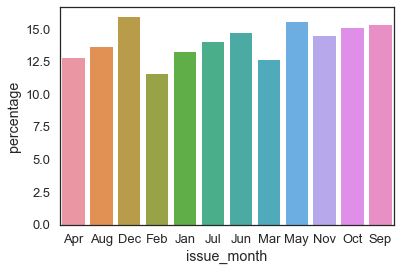

In [98]:
# plotting year wise % default percentage..
sns.barplot(x = 'issue_month', y = 'percentage', data = loan_year_df.loc[loan_year_df.loan_status == 'Charged Off'])

In [99]:
loan_df.groupby(['loan_status'])['id'].count()
#Charged Off  = 14.58
#Current = 3
#Fully Paid = 82.42

loan_status
Charged Off     5321
Fully Paid     32112
Name: id, dtype: int64

Year 2007 seems to have the highest % of default

<h1> Payment plan <h1>

In [100]:
loan_df.groupby('pymnt_plan')['id'].nunique()

pymnt_plan
n    37433
Name: id, dtype: int64

<h5> <I>Observation:</I> We can see that this field has only 1 single value across all its data element, hence not included 

In [101]:
loan_df.drop(['pymnt_plan'], inplace = True, axis = 1)
loan_df.shape

(37433, 45)

<h1> URL </h1>

In [102]:
loan_df['url'].head(10)

0     https://lendingclub.com/browse/loanDetail.acti...
1     https://lendingclub.com/browse/loanDetail.acti...
2     https://lendingclub.com/browse/loanDetail.acti...
3     https://lendingclub.com/browse/loanDetail.acti...
5     https://lendingclub.com/browse/loanDetail.acti...
6     https://lendingclub.com/browse/loanDetail.acti...
7     https://lendingclub.com/browse/loanDetail.acti...
8     https://lendingclub.com/browse/loanDetail.acti...
9     https://lendingclub.com/browse/loanDetail.acti...
10    https://lendingclub.com/browse/loanDetail.acti...
Name: url, dtype: object

<h5> <I> Observations: <I> These seem to be LC urls with the ID of the loan application.Doesnt seem to be adding any new information and hence rejecting it

In [103]:
loan_df.drop(['url'], inplace = True, axis = 1)
loan_df.shape

(37433, 44)

<h1> Purpose </h1>

In [104]:
loan_df.groupby('purpose')['id'].nunique().sort_values(ascending = False)

purpose
debt_consolidation    17637
credit_card            4895
other                  3692
home_improvement       2779
major_purchase         2069
small_business         1701
car                    1446
wedding                 906
medical                 654
moving                  550
house                   352
vacation                347
educational             312
renewable_energy         93
Name: id, dtype: int64

In [105]:
# Generate count and sum
purpose_def = loan_df.groupby('purpose')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
purpose_def["%_distribution"] = 100*purpose_def["count"].div(len(loan_df))
purpose_def["%_default"] = 100*purpose_def["sum"].div(purpose_def["count"])
purpose_def

,count,sum,%_distribution,%_default
purpose,,,,
car,1446,154,3.862902,10.650069
credit_card,4895,507,13.076697,10.357508
debt_consolidation,17637,2647,47.116181,15.008221
educational,312,50,0.833489,16.025641
home_improvement,2779,325,7.423931,11.694854
house,352,57,0.940347,16.193182
major_purchase,2069,205,5.527209,9.908168
medical,654,100,1.747122,15.290520
moving,550,84,1.469292,15.272727


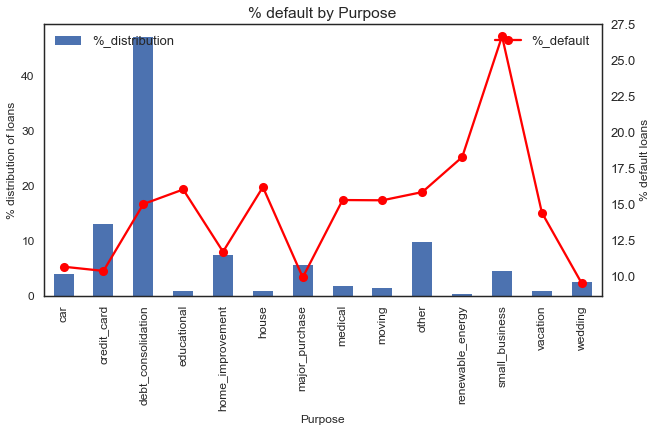

In [106]:

#Plotting
ax = purpose_def[['%_distribution']].plot(kind='bar', title ="% default by Purpose", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Purpose", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = purpose_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

<h5> <I> Observations: <I> The percentage of default is high Small business , renewable energy, educational

# Zip code

The first 3 numbers of the zip code provided by the borrower in the loan application.

In [107]:
loan_df.groupby('zip_code')['id'].nunique().sort_values(ascending = False)

zip_code
100xx    575
945xx    517
112xx    492
606xx    486
070xx    447
900xx    435
300xx    379
021xx    373
926xx    361
750xx    355
941xx    352
331xx    334
921xx    333
917xx    329
770xx    310
117xx    283
113xx    267
913xx    258
852xx    255
330xx    242
891xx    235
080xx    230
925xx    224
902xx    222
334xx    222
920xx    219
201xx    219
951xx    217
980xx    211
303xx    209
        ... 
473xx      1
471xx      1
375xx      1
096xx      1
169xx      1
248xx      1
250xx      1
252xx      1
266xx      1
289xx      1
332xx      1
353xx      1
369xx      1
372xx      1
373xx      1
378xx      1
469xx      1
381xx      1
383xx      1
384xx      1
385xx      1
386xx      1
388xx      1
396xx      1
397xx      1
408xx      1
414xx      1
463xx      1
465xx      1
007xx      1
Name: id, Length: 821, dtype: int64

In [108]:
loan_df.groupby('zip_code')['id'].nunique().count()

821

In [109]:
# Generate count and sum
zip_def = loan_df.groupby('zip_code')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
zip_def["%_distribution"] = 100*zip_def["count"].div(len(loan_df))
zip_def["%_default"] = 100*zip_def["sum"].div(zip_def["count"])
zip_def = zip_def.sort_values(by=['%_default'],ascending=False)
zip_def

,count,sum,%_distribution,%_default
zip_code,,,,
999xx,1,1,0.002671,100.000000
663xx,1,1,0.002671,100.000000
689xx,1,1,0.002671,100.000000
833xx,1,1,0.002671,100.000000
373xx,1,1,0.002671,100.000000
094xx,2,2,0.005343,100.000000
669xx,1,1,0.002671,100.000000
385xx,1,1,0.002671,100.000000
746xx,7,5,0.018700,71.428571


'Zip code' seems to be a very granular variable with only very few loans from each zip. Thus conclusions cannot be made with less number of data points

In [110]:

loan_df.drop(['zip_code'], inplace = True, axis = 1)
loan_df.shape

(37433, 43)

<h1> State </h1>

The state provided by the borrower in the loan application

In [111]:
# Generate count and sum
st_def = loan_df.groupby('addr_state')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
st_def["%_distribution"] = 100*st_def["count"].div(len(loan_df))
st_def["%_default"] = 100*st_def["sum"].div(st_def["count"])
st_def = st_def.sort_values(by = ['%_default'], ascending = False)
st_def

,count,sum,%_distribution,%_default
addr_state,,,,
NE,5,3,0.013357,60.000000
NV,463,101,1.236877,21.814255
AK,76,15,0.203029,19.736842
SD,60,11,0.160286,18.333333
FL,2690,478,7.186173,17.769517
HI,161,28,0.430102,17.391304
ID,6,1,0.016029,16.666667
NM,179,29,0.478188,16.201117
OR,420,68,1.122005,16.190476


In [112]:
#getting unique count of states
loan_df.groupby('addr_state')['id'].nunique().count()

50

In [113]:
#Generating "count" = total count of loans "sum" = Number of defaults
state_def = loan_df.groupby('addr_state')["loan_status_default"].agg(['count','sum'])
state_def["%_distribution"] = 100*state_def["count"].div(len(loan_df))
state_def["%_default"] = 100*state_def["sum"].div(state_def["count"])
state_def

,count,sum,%_distribution,%_default
addr_state,,,,
AK,76,15,0.203029,19.736842
AL,416,49,1.111319,11.778846
AR,226,26,0.603745,11.504425
AZ,803,113,2.145166,14.072229
CA,6742,1055,18.010846,15.648176
CO,744,91,1.987551,12.231183
CT,706,88,1.886036,12.464589
DC,209,15,0.558331,7.177033
DE,109,11,0.291187,10.091743


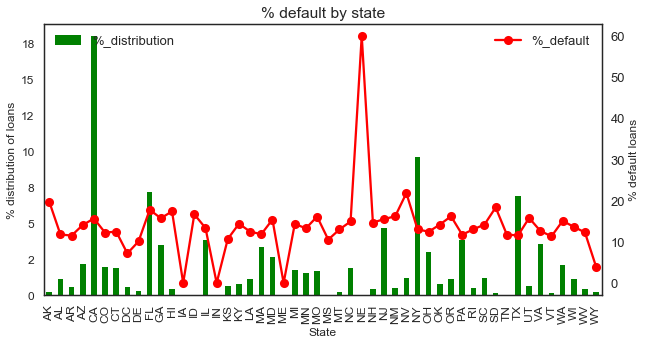

In [114]:

#Plotting
ax = state_def[['%_distribution']].plot(color='green', kind='bar', title ="% default by state", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("State", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = state_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()


# States - Florida , California have high % of loans & high % defaults as well. State Nebraska has highest default %.

<h1> No. of Delinquency in the past 2 years </h1>

In [115]:
# Generate count and sum
delinq_2yrs_def = loan_df.groupby('delinq_2yrs')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
delinq_2yrs_def["%_distribution"] = 100*delinq_2yrs_def["count"].div(len(loan_df))
delinq_2yrs_def["%_default"] = 100*delinq_2yrs_def["sum"].div(delinq_2yrs_def["count"])
delinq_2yrs_def

,count,sum,%_distribution,%_default
delinq_2yrs,,,,
0,33354,4669,89.103198,13.998321
1,3127,482,8.353592,15.414135
2,651,122,1.739107,18.740399
3,205,30,0.547645,14.634146
4,57,12,0.152272,21.052632
5,21,3,0.056100,14.285714
6,10,1,0.026714,10.000000
7,4,1,0.010686,25.000000
8,2,1,0.005343,50.000000


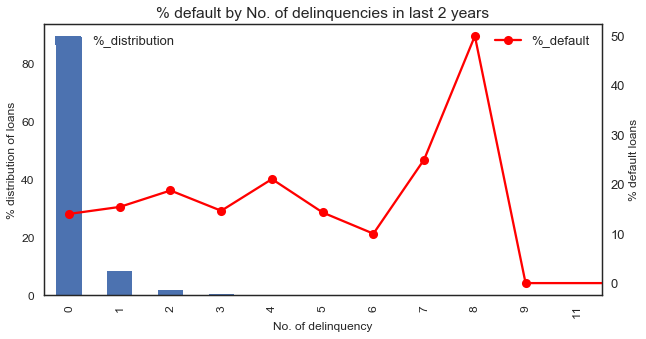

In [116]:


#Plotting
ax = delinq_2yrs_def[['%_distribution']].plot(kind='bar', title ="% default by No. of delinquencies in last 2 years", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("No. of delinquency", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = delinq_2yrs_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

<h5> <I> Observation: <I> higher delinquency leads to higher default from these graphs

<h1> dti </h1>

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

In [117]:
loan_df.groupby('dti')['id'].nunique().count()

2848

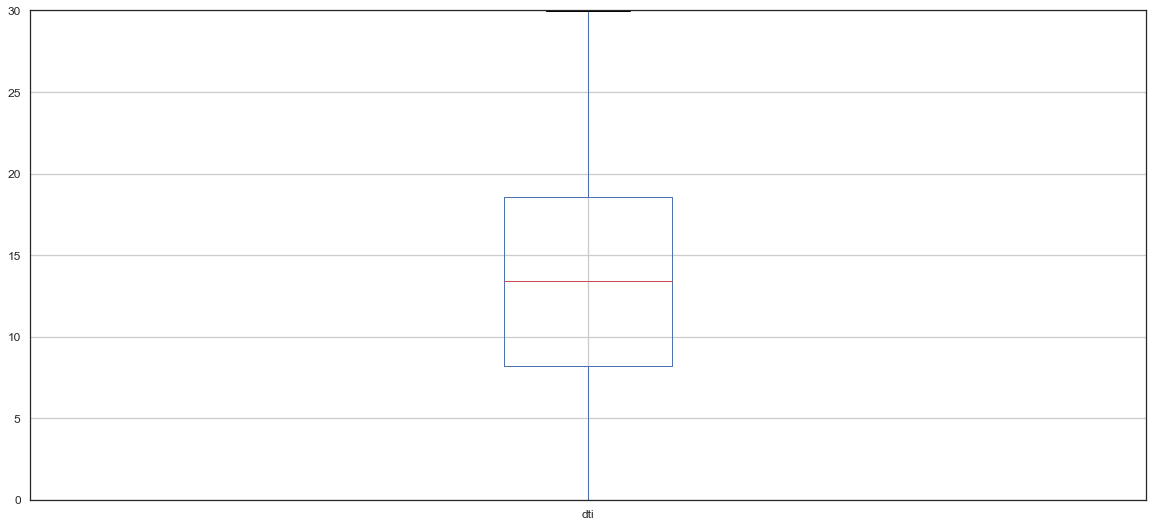

In [118]:
axes = loan_df.boxplot(column='dti',figsize=(10, 5),fontsize=12)
axes.set_ylim(ymax=30,ymin =0)


#exporting the plot to present in ppt
fig = axes.get_figure()
fig.set_size_inches(20, 9)
fig.savefig('dti.png',bbox_inches='tight')

plt.show()

In [119]:
loan_df['dti'].describe() 

count    37433.000000
mean        13.290727
std          6.658330
min          0.000000
25%          8.170000
50%         13.390000
75%         18.550000
max         29.990000
Name: dti, dtype: float64

In [120]:
#the limits are 0.00 8.130000 13.370000 1.856000e+01 2.999000e+01 

# creating bins for annual income
loan_df['dti_group'] = pd.cut(loan_df.dti,bins=[0, 8.17, 13.39, 18.55, 29.99],labels=["(q1)0-8.17%", "(q2)8.17%-13.39%", "(q3)13.39%-18.56%", "(q4)>18.56%"])

In [121]:
# Generate count and sum
dti_def = loan_df.groupby('dti_group')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
dti_def["%_distribution"] = 100*dti_def["count"].div(len(loan_df))
dti_def["%_default"] = 100*dti_def["sum"].div(dti_def["count"])
dti_def


,count,sum,%_distribution,%_default
dti_group,,,,
(q1)0-8.17%,9209,1097,24.601288,11.912260
(q2)8.17%-13.39%,9363,1261,25.012689,13.467906
(q3)13.39%-18.56%,9345,1418,24.964603,15.173890
(q4)>18.56%,9355,1519,24.991318,16.237306


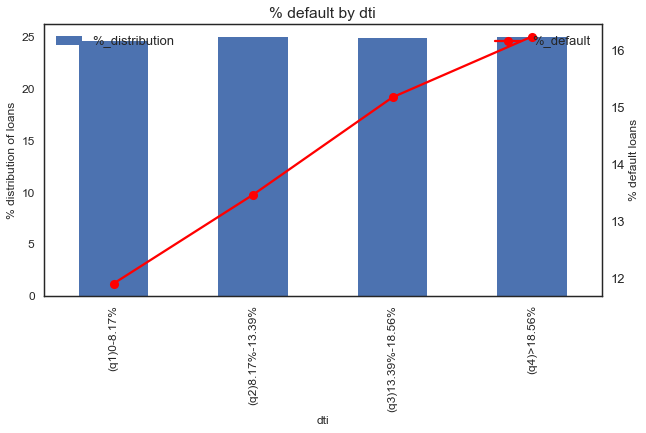

In [122]:
#Plotting
ax = dti_def[['%_distribution']].plot( kind='bar', title ="% default by dti", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("dti", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = dti_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

<h5> <I> Observation: <I> As the %dti increases there is a clear increase in the default %

Checking correlation

In [123]:
#finding the corelation
loan_df[['annual_inc', 'dti', 'revol_util', 'total_pymnt', 'loan_amnt']].corr()

,annual_inc,dti,total_pymnt,loan_amnt
annual_inc,1.000000,-0.123811,0.252879,0.266033
dti,-0.123811,1.000000,0.058207,0.061004
total_pymnt,0.252879,0.058207,1.000000,0.882812
loan_amnt,0.266033,0.061004,0.882812,1.000000


Total payment & loan amount are correlated


# Earliest CR lines

The month the borrower's earliest reported credit line was opened

In [124]:
loan_df['earliest_cr_line'].dtype
loan_df['earliest_cr_line'].head(10)

0     Jan-85
1     Apr-99
2     Nov-01
3     Feb-96
5     Nov-04
6     Jul-05
7     Jan-07
8     Apr-04
9     Sep-04
10    Jan-98
Name: earliest_cr_line, dtype: object

In [125]:
loan_df.shape

(37433, 44)

In [126]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')
#Python giving error

In [127]:
loan_df.groupby('earliest_cr_line')['id'].nunique().count()

514

In [128]:
loan_df.shape

(37433, 44)

In [129]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
#Extract year from the string

loan_df['earliest_cr_line_year'] =  loan_df['earliest_cr_line'].dt.year
loan_df.groupby('earliest_cr_line_year')['id'].nunique()


earliest_cr_line_year
1969      27
1970      37
1971      40
1972      38
1973      47
1974      53
1975      68
1976      77
1977      99
1978     137
1979     141
1980     162
1981     164
1982     199
1983     308
1984     370
1985     420
1986     455
1987     576
1988     681
1989     801
1990     973
1991     918
1992    1005
1993    1420
1994    1901
1995    2036
1996    2155
1997    2327
1998    2715
1999    2838
2000    3097
2001    2419
2002    1856
2003    1780
2004    1692
2005    1420
2006    1106
2007     673
2008     143
2046       1
2050       1
2054       1
2056       1
2062       3
2063       6
2064       3
2065       6
2066       8
2067      15
2068      14
Name: id, dtype: int64

Treating erroneous dates as the 2046 is actually 1946

In [130]:
loan_df.loc[loan_df.earliest_cr_line.dt.year > datetime.now().year, "earliest_cr_line"] = loan_df['earliest_cr_line'] - pd.DateOffset(years=100)

In [131]:
loan_df.shape

(37433, 45)

In [132]:
loan_df['earliest_cr_line_year'] =  loan_df['earliest_cr_line'].dt.year
loan_df.groupby('earliest_cr_line_year')['id'].nunique()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       6
1964       3
1965       6
1966       8
1967      15
1968      14
1969      27
1970      37
1971      40
1972      38
1973      47
1974      53
1975      68
1976      77
1977      99
1978     137
1979     141
1980     162
1981     164
1982     199
1983     308
1984     370
1985     420
1986     455
1987     576
1988     681
1989     801
1990     973
1991     918
1992    1005
1993    1420
1994    1901
1995    2036
1996    2155
1997    2327
1998    2715
1999    2838
2000    3097
2001    2419
2002    1856
2003    1780
2004    1692
2005    1420
2006    1106
2007     673
2008     143
Name: id, dtype: int64

In [133]:
# Generate count and sum
earliest_cr_yr_def = loan_df.groupby('earliest_cr_line_year')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
earliest_cr_yr_def["%_distribution"] = 100*earliest_cr_yr_def["count"].div(len(loan_df))
earliest_cr_yr_def["%_default"] = 100*earliest_cr_yr_def["sum"].div(earliest_cr_yr_def["count"])

earliest_cr_yr_def

,count,sum,%_distribution,%_default
earliest_cr_line_year,,,,
1946,1,0,0.002671,0.000000
1950,1,0,0.002671,0.000000
1954,1,0,0.002671,0.000000
1956,1,0,0.002671,0.000000
1962,3,1,0.008014,33.333333
1963,6,0,0.016029,0.000000
1964,3,0,0.008014,0.000000
1965,6,1,0.016029,16.666667
1966,8,1,0.021372,12.500000


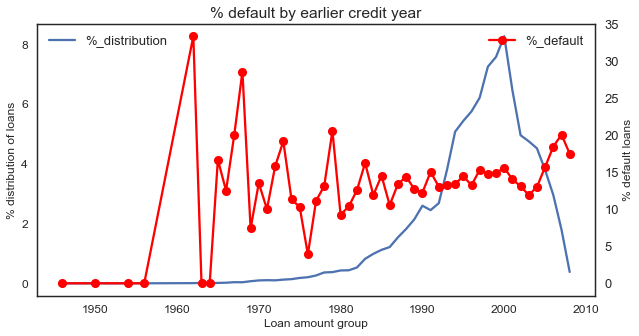

In [134]:

#Plotting
ax = earliest_cr_yr_def[['%_distribution']].plot(kind='line', title ="% default by earlier credit year", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("Loan amount group", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = earliest_cr_yr_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()


# Here we can see that in 2008 & 2007 there is high default %

# inq_last_6mths

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [135]:
loan_df.groupby('inq_last_6mths')['id'].nunique().count()

9

In [136]:
# Generate count and sum
inq_def = loan_df.groupby('inq_last_6mths')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
inq_def["%_distribution"] = 100*inq_def["count"].div(len(loan_df))
inq_def["%_default"] = 100*inq_def["sum"].div(inq_def["count"])
inq_def.reset_index(inplace = True)
inq_def = inq_def.sort_values(by='inq_last_6mths')
inq_def

,inq_last_6mths,count,sum,%_distribution,%_default
0,0,18146,2150,48.475944,11.848341
1,1,10352,1602,27.654743,15.475270
2,2,5490,890,14.666204,16.211293
3,3,2897,582,7.739161,20.089748
4,4,300,43,0.801432,14.333333
5,5,142,27,0.379344,19.014085
6,6,60,15,0.160286,25.000000
7,7,32,9,0.085486,28.125000
8,8,14,3,0.037400,21.428571


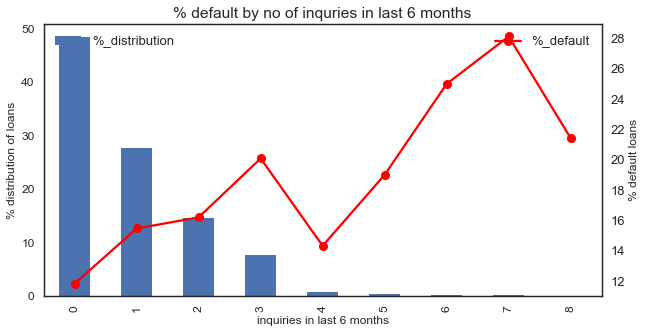

In [137]:
#Plotting
ax = inq_def[['%_distribution']].plot(kind='bar', title ="% default by no of inquries in last 6 months", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("inquiries in last 6 months", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = inq_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# Thus more enquiries more defaults

# open_acc

The total number of credit lines currently in the borrower's credit file

In [138]:
loan_df.groupby('open_acc')['id'].nunique().count()

40

In [139]:
# Generate count and sum
open_acc_def = loan_df.groupby('open_acc')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
open_acc_def["%_distribution"] = 100*open_acc_def["count"].div(len(loan_df))
open_acc_def["%_default"] = 100*open_acc_def["sum"].div(open_acc_def["count"])
open_acc_def.reset_index(inplace = True)
open_acc_def = open_acc_def.sort_values(by=['open_acc'])
open_acc_def

,open_acc,count,sum,%_distribution,%_default
0,2,539,111,1.439906,20.593692
1,3,1395,234,3.726658,16.774194
2,4,2202,335,5.882510,15.213442
3,5,2986,390,7.976919,13.060951
4,6,3717,507,9.929741,13.640032
5,7,3809,529,10.175514,13.888160
6,8,3706,512,9.900355,13.815434
7,9,3515,489,9.390110,13.911807
8,10,3028,446,8.089119,14.729194
9,11,2607,370,6.964443,14.192558


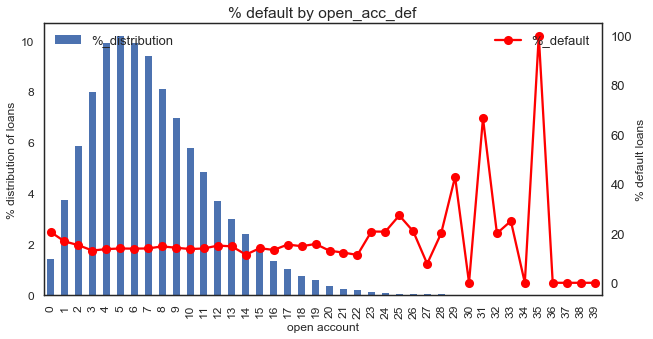

In [140]:
#Plotting
ax = open_acc_def[['%_distribution']].plot(kind='bar', title ="% default by open_acc_def", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("open account", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = open_acc_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

No relationship can be established conclusively

In [141]:
loan_df.drop(['open_acc'], inplace = True, axis = 1)
loan_df.shape

(37433, 44)

# Pub Rec - Number of derogatory public records

In [142]:
loan_df.groupby('pub_rec')['id'].nunique().count()

5

In [143]:
# Generate count and sum
pub_rec_def = loan_df.groupby('pub_rec')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
pub_rec_def["%_distribution"] = 100*pub_rec_def["count"].div(len(loan_df))
pub_rec_def["%_default"] = 100*pub_rec_def["sum"].div(pub_rec_def["count"])
pub_rec_def.reset_index(inplace = True)
pub_rec_def = pub_rec_def.sort_values(by=['pub_rec'])
pub_rec_def

,pub_rec,count,sum,%_distribution,%_default
0,0,35491,4894,94.812064,13.789411
1,1,1887,417,5.041007,22.098569
2,2,46,10,0.122886,21.739130
3,3,7,0,0.018700,0.000000
4,4,2,0,0.005343,0.000000


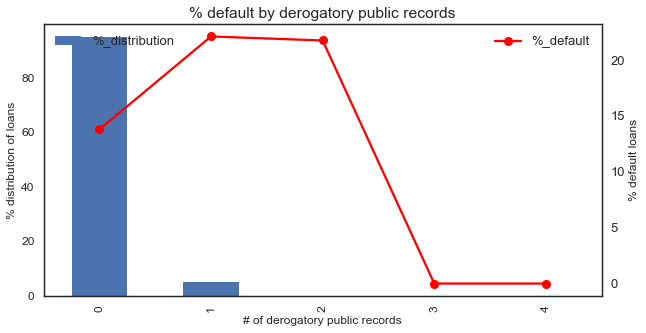

In [144]:
#Plotting
ax = pub_rec_def[['%_distribution']].plot(kind='bar', title ="% default by derogatory public records", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("# of derogatory public records", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = pub_rec_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# Revolving balance

In [145]:
loan_df.groupby('revol_bal')['id'].nunique().count()

20986

In [146]:
loan_df['revol_bal'].describe()

count     37433.000000
mean      13389.842198
std       15904.465473
min           0.000000
25%        3714.000000
50%        8863.000000
75%       17035.000000
max      149588.000000
Name: revol_bal, dtype: float64

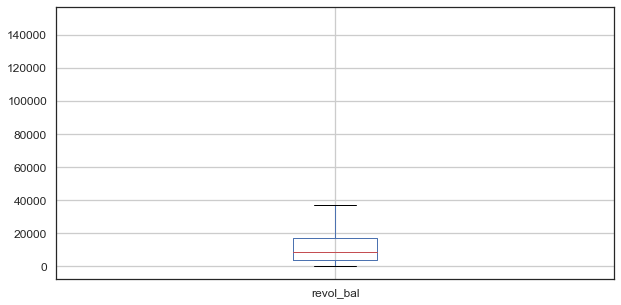

In [147]:
axes = loan_df.boxplot(column='revol_bal',figsize=(10, 5),fontsize=12)
plt.show()

In [148]:
#the limits are 0, 3714.000000	8863.000000	17035	1.495880e+05


# creating bins for annual income
loan_df['revol_bal_group'] = pd.cut(loan_df.revol_bal,bins=[0,3714, 8863, 17035, 149588],labels=["(q1)0-3714", "(q2)3714-8863", "(q3)8863-17035", "(q4)>17035"])

In [149]:
# Generate count and sum
revol_bal_group_def = loan_df.groupby('revol_bal_group')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
revol_bal_group_def["%_distribution"] = 100*revol_bal_group_def["count"].div(len(loan_df))
revol_bal_group_def["%_default"] = 100*revol_bal_group_def["sum"].div(revol_bal_group_def["count"])
revol_bal_group_def

,count,sum,%_distribution,%_default
revol_bal_group,,,,
(q1)0-3714,8471,1080,22.629765,12.749380
(q2)3714-8863,9357,1328,24.996661,14.192583
(q3)8863-17035,9360,1363,25.004675,14.561966
(q4)>17035,9356,1419,24.993989,15.166738


No pattern observed. Hence excluding the variable

# Last Revolving balance utilization

In [150]:
loan_df.groupby('revol_util')["id"].nunique().count()

1086

In [151]:
loan_df['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [152]:
#Converting string to number
loan_df['revol_util']=loan_df["revol_util"].str.replace("%","").astype(np.float64)

In [153]:
loan_df['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

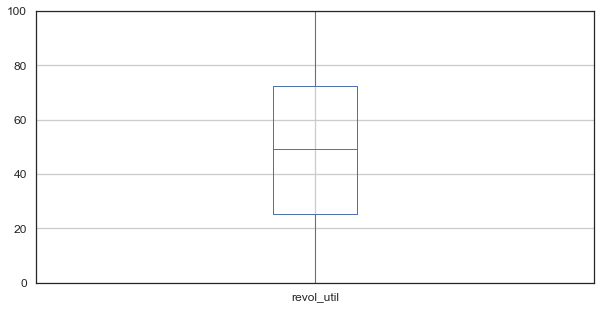

In [154]:
axes = loan_df.boxplot(column='revol_util',figsize=(10, 5),fontsize=12)
axes.set_ylim(ymax=100,ymin =0)

plt.show()

In [155]:
#the limits are 0, 25, 50 75


# creating bins 
loan_df['revol_util_group'] = pd.cut(loan_df.revol_util,bins=[0,25,50,75,100],labels=["(q1)0%-25%", "(q2)25%-50%", "(q3)50%-75%", "(q4)>75%"])

In [156]:
# Generate count and sum
revol_util_group_def = loan_df.groupby('revol_util_group')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
revol_util_group_def["%_distribution"] = 100*revol_util_group_def["count"].div(len(loan_df))
revol_util_group_def["%_default"] = 100*revol_util_group_def["sum"].div(revol_util_group_def["count"])
revol_util_group_def

,count,sum,%_distribution,%_default
revol_util_group,,,,
(q1)0%-25%,8321,763,22.229049,9.169571
(q2)25%-50%,9808,1253,26.201480,12.775285
(q3)50%-75%,10016,1583,26.757139,15.804712
(q4)>75%,8372,1589,22.365293,18.979933


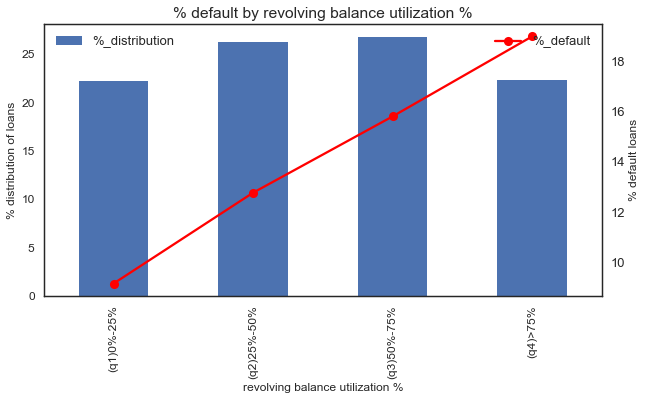

In [157]:
#Plottingn
ax = revol_util_group_def[['%_distribution']].plot(kind='bar', title ="% default by revolving balance utilization %", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("revolving balance utilization %", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = revol_util_group_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# There seems to be higher default when the % revolving balance utilization is high

# total_acc - The total number of credit lines currently in the borrower's credit file

In [158]:
loan_df_sub = loan_df
loan_df_sub.groupby('total_acc')["id"].nunique().count()

82

In [159]:
loan_df_sub['total_acc'].head()

0     9
1     4
2    10
3    37
5    12
Name: total_acc, dtype: int64

In [160]:
loan_df_sub['total_acc'].describe()

count    37433.000000
mean        22.107712
std         11.412473
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [161]:
#the limits I'm giving in increments of 10
# creating bins 
loan_df_sub['total_acc_group'] = pd.cut(loan_df_sub.total_acc,bins=[0,10,20,30,40,50,60,70,80,90,100],labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80-90",">90"])

In [162]:
# Generate count and sum
total_acc_def = loan_df_sub.groupby('total_acc_group')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
total_acc_def["%_distribution"] = 100*total_acc_def["count"].div(len(loan_df_sub))
total_acc_def["%_default"] = 100*total_acc_def["sum"].div(total_acc_def["count"])
total_acc_def

,count,sum,%_distribution,%_default
total_acc_group,,,,
0-10,5594,897,14.944033,16.035038
10-20,13226,1903,35.332461,14.388326
20-30,10626,1411,28.386718,13.278750
30-40,5345,749,14.278845,14.013096
40-50,1890,270,5.049021,14.285714
50-60,555,66,1.482649,11.891892
60-70,182,24,0.486202,13.186813
70-80,12,1,0.032057,8.333333
80-90,3,0,0.008014,0.000000


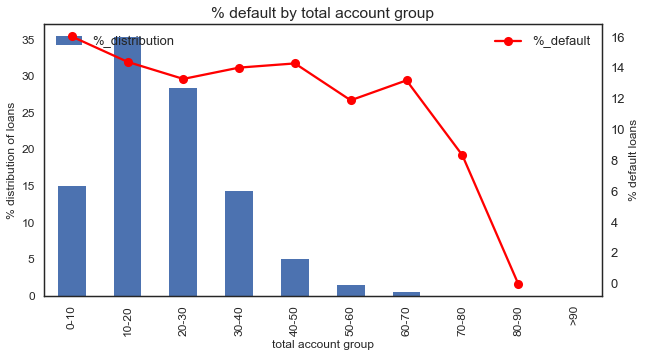

In [163]:
#Plotting
ax = total_acc_def[['%_distribution']].plot(kind='bar', title ="% default by total account group", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("total account group", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = total_acc_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

No major relationship in the 0-10 to 50-60 range which has the majority of loans, hence excluding this variable

# initial_list_status

In [164]:
loan_df_sub.groupby('initial_list_status')["id"].nunique().count()

1

In [165]:
loan_df_sub.drop(['initial_list_status'], inplace = True, axis = 1)
loan_df_sub.shape

(37433, 46)

# total_pymnt

In [166]:
loan_df_sub.groupby('total_pymnt')["id"].nunique().count()

35703

In [167]:
loan_df_sub['total_pymnt'].describe()

count    37433.000000
mean     11985.633298
std       8819.368109
min         33.730000
25%       5581.772363
50%       9811.445233
75%      16272.119970
max      58563.679930
Name: total_pymnt, dtype: float64

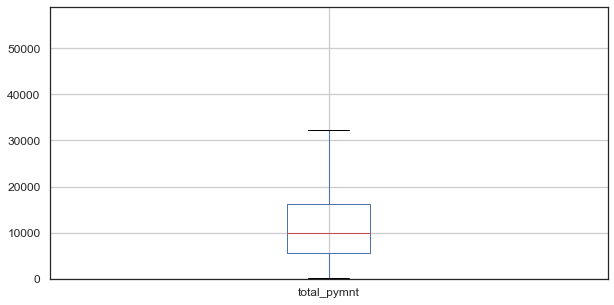

In [168]:
axes = loan_df_sub.boxplot(column='total_pymnt',figsize=(10, 5),fontsize=12)
axes.set_ylim(ymax=59000,ymin =0)
plt.show()

In [169]:

# creating bins 
loan_df_sub['total_pymnt_group'] = pd.cut(loan_df_sub.total_pymnt,bins=[0,5581,9811,16272,58563],labels=["(q1)0-5581", "(q2)5581-9811", "(q3)9811-16272", "(q4)>16272"])

In [170]:
# Generate count and sum
total_pymnt_group_def = loan_df_sub.groupby('total_pymnt_group')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
total_pymnt_group_def["%_distribution"] = 100*total_pymnt_group_def["count"].div(len(loan_df_sub))
total_pymnt_group_def["%_default"] = 100*total_pymnt_group_def["sum"].div(total_pymnt_group_def["count"])
total_pymnt_group_def

,count,sum,%_distribution,%_default
total_pymnt_group,,,,
(q1)0-5581,9350,2922,24.977961,31.251337
(q2)5581-9811,9366,1152,25.020704,12.299808
(q3)9811-16272,9358,762,24.999332,8.142766
(q4)>16272,9358,485,24.999332,5.182731


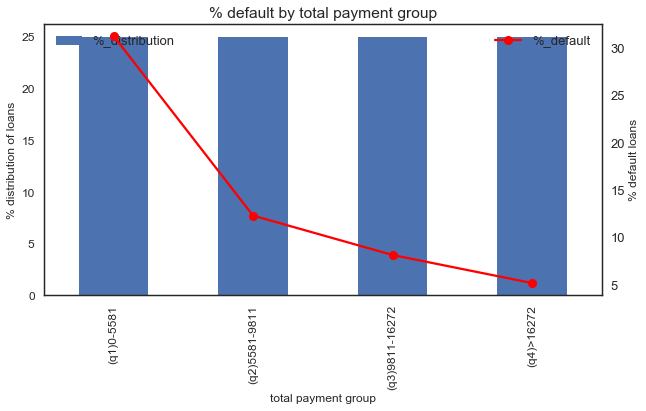

In [171]:


#Plotting
ax = total_pymnt_group_def[['%_distribution']].plot(kind='bar', title ="% default by total payment group", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("total payment group", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = total_pymnt_group_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

Here we see that lesser payment made is a good inidcator of high default

In [172]:
loan_df_sub.corr()

,id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,revol_util,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,loan_status_default,int_rate_round,issue_year,earliest_cr_line_year
id,1.000000,0.124778,0.079339,0.008886,0.090940,-0.008027,-0.040925,-0.019727,0.001055,0.093685,...,-0.055858,0.039706,-0.010225,0.145120,NaN,-0.001478,0.042038,0.056750,0.848091,0.074729
loan_amnt,0.124778,1.000000,0.931524,0.266033,0.061004,-0.033552,0.012632,-0.046142,0.312863,0.062709,...,0.047055,0.142827,0.076561,0.473692,NaN,-0.030647,0.064859,0.300955,0.114624,-0.191474
installment,0.079339,0.931524,1.000000,0.264435,0.050434,-0.021533,0.010859,-0.041914,0.308728,0.092399,...,0.057875,0.121227,0.077021,0.412236,NaN,-0.028766,0.031542,0.277034,0.057184,-0.169861
annual_inc,0.008886,0.266033,0.264435,1.000000,-0.123811,0.021388,0.036237,-0.014424,0.276400,0.014873,...,0.006303,0.022401,0.016222,0.140994,NaN,-0.012159,-0.037097,0.047113,0.012747,-0.190776
dti,0.090940,0.061004,0.050434,-0.123811,1.000000,-0.034462,0.000137,-0.004862,0.227346,0.279089,...,-0.011922,0.025321,0.010767,0.008819,NaN,0.007789,0.043984,0.112910,0.093463,-0.038680
delinq_2yrs,-0.008027,-0.033552,-0.021533,0.021388,-0.034462,1.000000,0.007897,0.009689,-0.054926,-0.042903,...,0.029085,0.012179,0.013870,-0.013276,NaN,0.004557,0.018326,0.158056,-0.002402,-0.069143
inq_last_6mths,-0.040925,0.012632,0.010859,0.036237,0.000137,0.007897,1.000000,0.023482,-0.021167,-0.070571,...,0.030900,0.017856,0.011791,0.028447,NaN,0.013517,0.069580,0.134401,-0.060065,-0.011150
pub_rec,-0.019727,-0.046142,-0.041914,-0.014424,-0.004862,0.009689,0.023482,1.000000,-0.058359,0.058488,...,-0.003287,-0.006161,-0.007044,-0.032866,NaN,0.836883,0.049448,0.097592,-0.009273,-0.051605
revol_bal,0.001055,0.312863,0.308728,0.276400,0.227346,-0.054926,-0.021167,-0.058359,1.000000,0.303048,...,0.005681,0.042925,0.022947,0.124473,NaN,-0.045673,0.008891,0.096782,-0.008894,-0.269180
revol_util,0.093685,0.062709,0.092399,0.014873,0.279089,-0.042903,-0.070571,0.058488,0.303048,1.000000,...,0.039300,0.051978,0.027069,-0.016231,NaN,0.060421,0.100013,0.465371,0.069852,0.043010


In [173]:
#dropping unwanted variables suchas - Policy code
loan_df_sub.drop(['policy_code','out_prncp','out_prncp_inv'], inplace = True, axis = 1)
loan_df_sub.shape

(37433, 44)

In [174]:
#Removing total_rec_late_fee & recoveries as these happen after a loan is defaulted
loan_df_sub.drop(['recoveries','collection_recovery_fee','last_pymnt_amnt'], inplace = True, axis = 1)
loan_df_sub.shape

(37433, 41)

In [175]:
#dropping hihgly correlated variables
#finding the corelation
loan_df[['total_pymnt_inv', 'total_rec_prncp', 'revol_util', 'total_pymnt', 'loan_amnt']].corr()

,total_pymnt_inv,total_rec_prncp,revol_util,total_pymnt,loan_amnt
total_pymnt_inv,1.000000,0.939333,0.077915,0.967882,0.847863
total_rec_prncp,0.939333,1.000000,0.021250,0.973334,0.846804
revol_util,0.077915,0.021250,1.000000,0.074123,0.062709
total_pymnt,0.967882,0.973334,0.074123,1.000000,0.882812
loan_amnt,0.847863,0.846804,0.062709,0.882812,1.000000


In [176]:
#dropping unwanted variables suchas - Policy code
loan_df_sub.drop(['total_pymnt_inv','total_rec_prncp'], inplace = True, axis = 1)
loan_df_sub.shape

(37433, 39)

In [177]:
loan_df_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
id,37433.0,674496.133572,209829.111873,54734.00,509401.000000,653823.000000,827049.00000,1.077501e+06
loan_amnt,37433.0,11131.332648,7352.376591,500.00,5500.000000,10000.000000,15000.00000,3.500000e+04
installment,37433.0,324.951288,208.851918,15.69,167.570000,280.610000,429.45000,1.305190e+03
annual_inc,37433.0,69467.319401,64713.307466,4000.00,41000.000000,60000.000000,83000.00000,6.000000e+06
dti,37433.0,13.290727,6.658330,0.00,8.170000,13.390000,18.55000,2.999000e+01
delinq_2yrs,37433.0,0.146956,0.492804,0.00,0.000000,0.000000,0.00000,1.100000e+01
inq_last_6mths,37433.0,0.871664,1.070768,0.00,0.000000,1.000000,1.00000,8.000000e+00
pub_rec,37433.0,0.053643,0.234494,0.00,0.000000,0.000000,0.00000,4.000000e+00
revol_bal,37433.0,13389.842198,15904.465473,0.00,3714.000000,8863.000000,17035.00000,1.495880e+05
revol_util,37433.0,48.861928,28.341021,0.00,25.400000,49.300000,72.40000,9.990000e+01


# Application type

In [178]:
loan_df_sub.groupby('application_type')['id'].nunique().count()

1

In [179]:
loan_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37433 entries, 0 to 38530
Data columns (total 39 columns):
id                       37433 non-null int64
loan_amnt                37433 non-null int64
term                     37433 non-null object
int_rate                 37433 non-null object
installment              37433 non-null float64
sub_grade                37433 non-null object
annual_inc               37433 non-null float64
verification_status      37433 non-null object
issue_d                  37433 non-null object
loan_status              37433 non-null object
purpose                  37433 non-null object
addr_state               37433 non-null object
dti                      37433 non-null float64
delinq_2yrs              37433 non-null int64
earliest_cr_line         37433 non-null datetime64[ns]
inq_last_6mths           37433 non-null int64
pub_rec                  37433 non-null int64
revol_bal                37433 non-null int64
revol_util               37433 non-null 

Only 1 value and hence excluded

In [180]:
loan_df.drop(['application_type'], inplace = True, axis = 1)
loan_df.shape

(37433, 38)

# last_credit_pull_d - The most recent month LC pulled credit for this loan

In [181]:
loan_df_sub['last_credit_pull_d'].head()

0    May-16
1    Sep-13
2    May-16
3    Apr-16
5    Jan-16
Name: last_credit_pull_d, dtype: object

In [182]:

from datetime import datetime
from dateutil.parser import parse
import pandas as pd

loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], format='%b-%y')

loan_df['last_credit_pull_d_year'] =  loan_df['last_credit_pull_d'].dt.year
loan_df.groupby('last_credit_pull_d_year')['id'].nunique()

last_credit_pull_d_year
2007       36
2008       41
2009      224
2010      827
2011     2115
2012     3953
2013     5020
2014     6002
2015     5348
2016    13867
Name: id, dtype: int64

In [183]:
# Generate count and sum
last_credit_pull_def = loan_df_sub.groupby('earliest_cr_line_year')["loan_status_default"].agg(['count','sum'])
# looking at % default by different bins
last_credit_pull_def["%_distribution"] = 100*last_credit_pull_def["count"].div(len(loan_df_sub))
last_credit_pull_def["%_default"] = 100*last_credit_pull_def["sum"].div(last_credit_pull_def["count"])

last_credit_pull_def

,count,sum,%_distribution,%_default
earliest_cr_line_year,,,,
1946,1,0,0.002671,0.000000
1950,1,0,0.002671,0.000000
1954,1,0,0.002671,0.000000
1956,1,0,0.002671,0.000000
1962,3,1,0.008014,33.333333
1963,6,0,0.016029,0.000000
1964,3,0,0.008014,0.000000
1965,6,1,0.016029,16.666667
1966,8,1,0.021372,12.500000


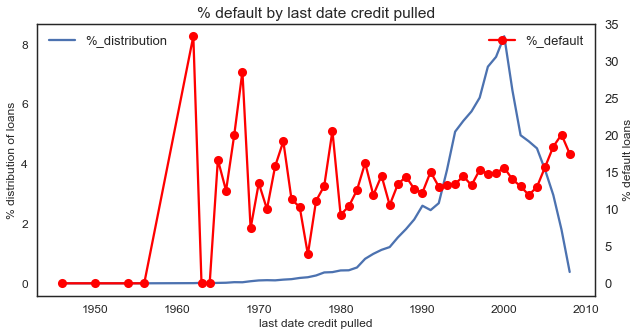

In [184]:

#Plotting
ax = last_credit_pull_def[['%_distribution']].plot(kind='line', title ="% default by last date credit pulled", figsize=(10, 5), legend=True, fontsize=12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel("last date credit pulled", fontsize=12)
ax.set_ylabel("% distribution of loans", fontsize=12)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.set_ylabel("% default loans", fontsize=12)
ax3 = last_credit_pull_def[['%_default']].plot( ax=ax2, color='red', figsize=(10, 5),legend=True, label='% distribution', marker='o')
ax3.legend(loc='upper right')
plt.show()

# The default % is higher towards later years

# pub_rec_bankruptcies     

'Pub rec bankruptcies' is highly correlated with 'pub rec' we can keep one of them

In [185]:
loan_df_sub[['pub_rec_bankruptcies', 'pub_rec']].corr()

,pub_rec_bankruptcies,pub_rec
pub_rec_bankruptcies,1.000000,0.836883
pub_rec,0.836883,1.000000


In [186]:
loan_df_sub.groupby('pub_rec_bankruptcies')['id'].count()

pub_rec_bankruptcies
0.0    35905
1.0     1523
2.0        5
Name: id, dtype: int64

In [187]:
loan_df_sub.groupby('pub_rec')['id'].count()

pub_rec
0    35491
1     1887
2       46
3        7
4        2
Name: id, dtype: int64

# Choosing 'Pub_rec' as it has more values

In [188]:
loan_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37433 entries, 0 to 38530
Data columns (total 39 columns):
id                         37433 non-null int64
loan_amnt                  37433 non-null int64
term                       37433 non-null object
int_rate                   37433 non-null object
installment                37433 non-null float64
sub_grade                  37433 non-null object
annual_inc                 37433 non-null float64
verification_status        37433 non-null object
issue_d                    37433 non-null object
loan_status                37433 non-null object
purpose                    37433 non-null object
addr_state                 37433 non-null object
dti                        37433 non-null float64
delinq_2yrs                37433 non-null int64
earliest_cr_line           37433 non-null datetime64[ns]
inq_last_6mths             37433 non-null int64
pub_rec                    37433 non-null int64
revol_bal                  37433 non-null int64
revo

Thus based on the initial analysis the following variables seem to drive 'default' among loans

id, 
loan_amnt, 
term, 
int_rate, 
sub_grade, 
annual_inc, 
verification_status, 
issue_d, 
loan_status, 
purpose, 
addr_state, 
dti, 
delinq_2yrs, 
earliest_cr_line, 
inq_last_6mths, 
pub_rec, 
revol_util, 
total_pymnt, 
last_credit_pull_d, 
pub_rec_bankruptcies


<h3> bivariate analysis between int_rate and subgrade

In [189]:
#relationship between sub_grade and int_rate
loan_sub_grade_int_rate_ratio = pd.DataFrame({'int_rate_round': loan_df.loc[loan_df.loan_status == 'Charged Off'].groupby(['sub_grade'])['int_rate_round'].mean()})
loan_sub_grade_int_rate_ratio.reset_index(inplace = True)
loan_sub_grade_int_rate_ratio.head()

,sub_grade,int_rate_round
0,A1,5.583333
1,A2,6.567164
2,A3,7.426966
3,A4,7.654762
4,A5,8.426471


Text(0.5,1,'sub_grade vs int_rate')

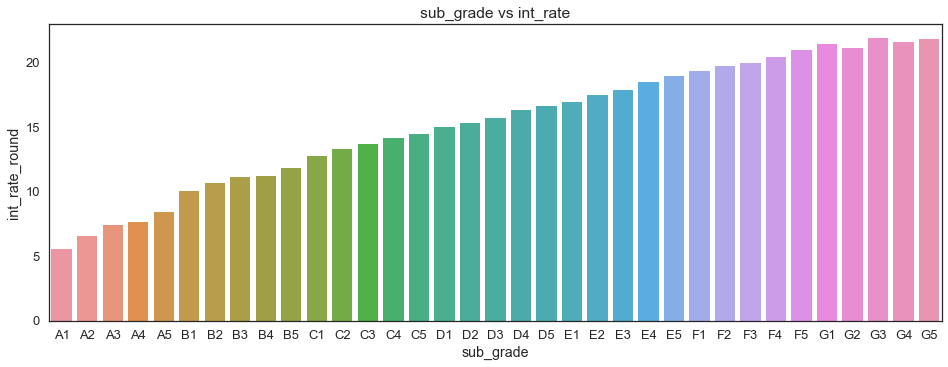

In [190]:
plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
sns.barplot(y = 'int_rate_round', x = 'sub_grade', data = loan_sub_grade_int_rate_ratio)
plt.title('sub_grade vs int_rate')

# Lower the sub grade  higher the  int_rate for the loan.

<h3> state & purpose </h3>

In [191]:
# headMap..
purpose_arr = loan_df.purpose.unique()
state_arr = loan_df.addr_state.unique()

In [192]:
purpose_arr_df = []
state_arr_df = []
charged_off_df = []
paid_off_df = []

for i in purpose_arr:
    for j in state_arr:
        purpose_arr_df.append(i)
        state_arr_df.append(j)
        ch_count = loan_df.loc[(loan_df.purpose == i) & (loan_df.addr_state == j) & (loan_df.loan_status == 'Charged Off')]['id'].count()
        paid_count = loan_df.loc[(loan_df.purpose == i) & (loan_df.addr_state == j) & (loan_df.loan_status == 'Fully Paid')]['id'].count()
        charged_off_df.append(ch_count)
        paid_off_df.append(paid_count)

In [193]:
corr_df = pd.DataFrame({'purpose': purpose_arr_df, 'state': state_arr_df, 'ch_count': charged_off_df, 'paid_count': paid_off_df})
corr_df['percentage'] = round(100*corr_df['ch_count'] / (corr_df['ch_count'] + corr_df['paid_count']))
corr_df.drop(['ch_count', 'paid_count'], axis=1, inplace= True)
corr_df.sort_values(by = 'percentage', ascending= False, inplace = True)
corr_df.head(20)

,purpose,state,percentage
526,vacation,AK,100.0
538,vacation,HI,100.0
579,house,WV,100.0
584,house,NH,100.0
470,moving,LA,100.0
609,renewable_energy,UT,100.0
346,home_improvement,NE,100.0
565,house,OR,67.0
621,renewable_energy,MA,50.0
612,renewable_energy,MN,50.0


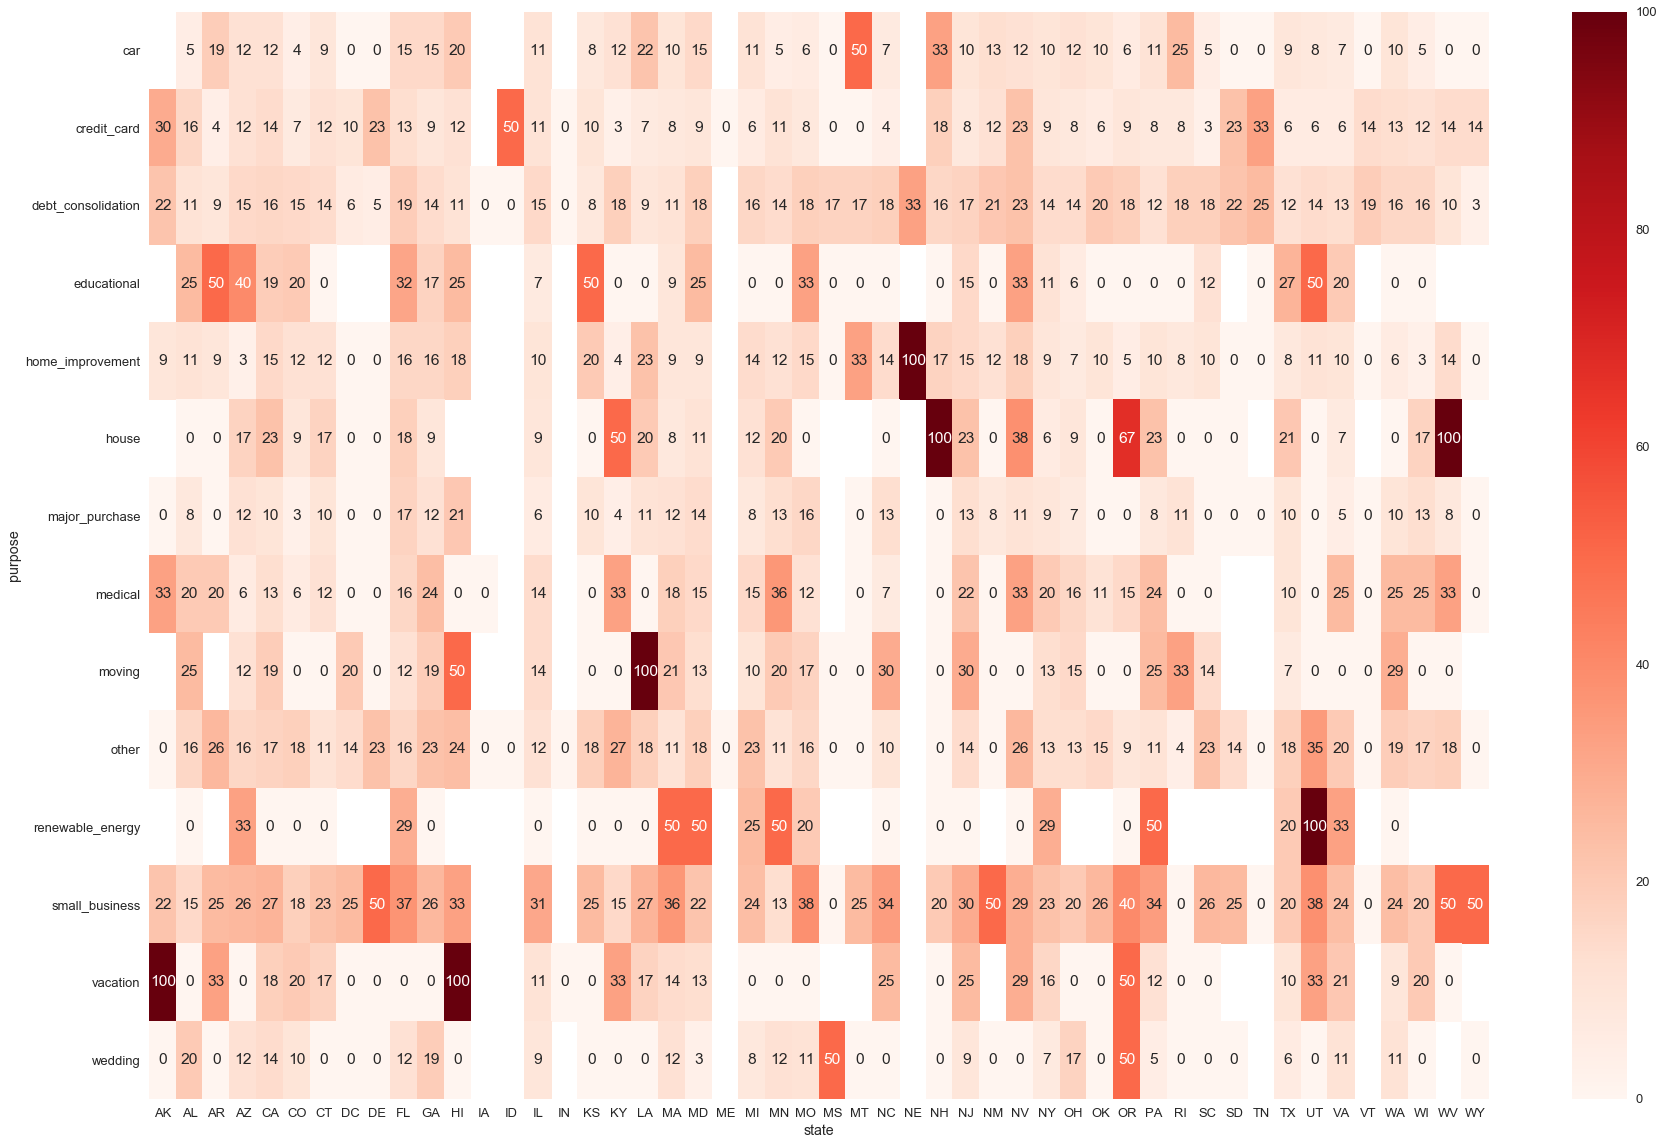

In [194]:
plt.figure(figsize=(30, 20))
corr_df_pivot = corr_df.pivot("purpose", "state", "percentage")
sns.heatmap(corr_df_pivot,  cmap="Reds", fmt=".0f", annot=True)

<h4>here this above heatMap is showing the charged off percentage between purpose and state </h4>

<h2>purpose & verification_status </h2>

In [195]:
loan_df_purpose = pd.DataFrame({'tot_count': loan_df.groupby(['purpose', 'verification_status'])['id'].count()})
loan_df_purpose.reset_index(inplace = True)
loan_df_purpose_ch = pd.DataFrame({'count': loan_df.loc[loan_df.loan_status == 'Charged Off'].groupby(['purpose', 'verification_status'])['id'].count()})
loan_df_purpose_ch.reset_index(inplace = True)
loan_df_purpose_ch['tot_count'] = loan_df_purpose['tot_count']
loan_df_purpose_ch['percentage'] = round(100 *loan_df_purpose_ch['count'] / loan_df_purpose_ch['tot_count'])
loan_df_purpose_ch.drop(['count', 'tot_count'], axis = 1, inplace= True)
loan_df_purpose_ch.head()
#loan_df_purpose_ch.shape

,purpose,verification_status,percentage
0,car,Not Verified,8.0
1,car,Source Verified,12.0
2,car,Verified,16.0
3,credit_card,Not Verified,9.0
4,credit_card,Source Verified,11.0


In [196]:
loan_df_purpose_ch.shape

(42, 3)

Text(0.5,1,'purpose vs verification_status (heatMap)')

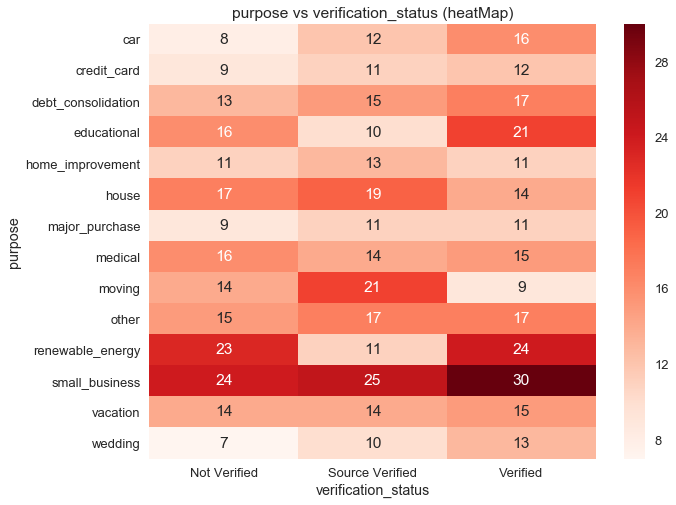

In [197]:
#heatMap for purpose vs verification_status
loan_df_purpose_pivot = loan_df_purpose_ch.pivot("purpose", "verification_status", "percentage")
plt.figure(figsize=(10, 8))
sns.heatmap(loan_df_purpose_pivot,  cmap="Reds", fmt=".0f", annot=True)
plt.title('purpose vs verification_status (heatMap)')
#numbers are showing % of charged off. 

<h3> The heatMap is showing the relationship between verification_status and purpose.. The numbers are nothing but charged off loan %.
Top 5 combinations are..
i. small_business & Not verified.
ii.small_business & Soure_verified.
iii. small_business & Verified. 
iv. renewable_energy & Not verified. 
v. renewable_energy & verified.

<h3>sub_grade & verification_status </h3>

In [198]:
loan_df_sub_grade = pd.DataFrame({'tot_count': loan_df.groupby(['sub_grade', 'verification_status'])['id'].count()})
loan_df_sub_grade.reset_index(inplace = True)
loan_df_sub_grade_ch = pd.DataFrame({'count': loan_df.loc[loan_df.loan_status == 'Charged Off'].groupby(['sub_grade', 'verification_status'])['id'].count()})
loan_df_sub_grade_ch.reset_index(inplace = True)
loan_df_sub_grade_ch['tot_count'] = loan_df_purpose['tot_count']
loan_df_sub_grade_ch['percentage'] = round(100 *loan_df_sub_grade_ch['count'] / loan_df_sub_grade['tot_count'])
loan_df_sub_grade_ch.drop(['count', 'tot_count'], axis = 1, inplace= True)
loan_df_sub_grade_ch.head()
#loan_df_purpose_ch.shape

,sub_grade,verification_status,percentage
0,A1,Not Verified,2.0
1,A1,Source Verified,2.0
2,A1,Verified,2.0
3,A2,Not Verified,5.0
4,A2,Source Verified,4.0


Text(0.5,1,'verification_status vs sub_grade (heatMap)')

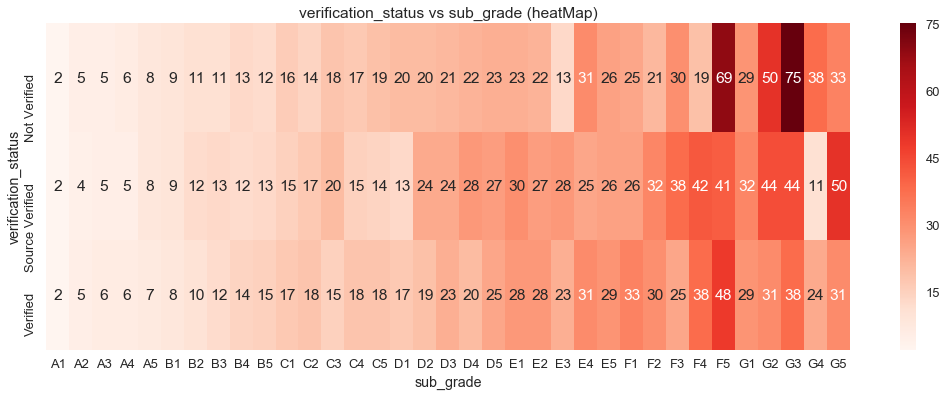

In [199]:
#heatMap for sub_grade vs verification_status
loan_df_purpose_pivot = loan_df_sub_grade_ch.pivot("verification_status", "sub_grade","percentage")
plt.figure(figsize=(18, 6))
sns.heatmap(loan_df_purpose_pivot,  cmap="Reds", fmt=".0f", annot=True)
plt.title("verification_status vs sub_grade (heatMap)")
#numbers are showing % of charged off. 

# Section 3 : Derived Matrix

<h3> <I> emi_annual_inc_ratio </h3>

In [200]:
#creating a derived variable called emi_annual_inc_ratio
loan_df['emi_annual_inc_ratio'] = round(100*12*loan_df['installment']/loan_df['annual_inc'])
loan_df['emi_annual_inc_ratio'].head()

0    8.0
1    2.0
2    8.0
3    8.0
5    5.0
Name: emi_annual_inc_ratio, dtype: float64

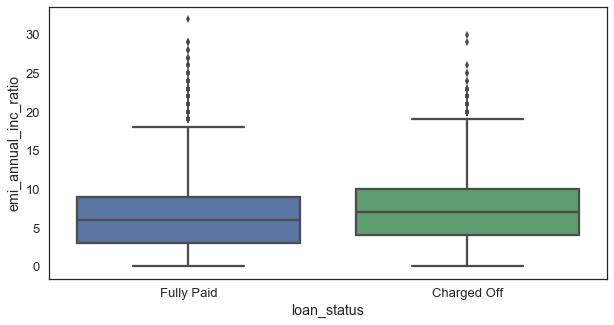

In [201]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'loan_status', y = 'emi_annual_inc_ratio', data = loan_df)
plt.show()

# spread for emi_annual_inc_ratio is higher for charged off loans.

In [202]:
loan_df_emi_ratio = pd.DataFrame({'count': loan_df.groupby(['emi_annual_inc_ratio', 'loan_status'])['id'].count()})
loan_df_emi_ratio.reset_index(inplace = True)
loan_df_emi_ratio['total_count'] = loan_df_emi_ratio.emi_annual_inc_ratio.apply(lambda x : loan_df.loc[loan_df.emi_annual_inc_ratio == x]['id'].count())
loan_df_emi_ratio['percentage'] = round(100*loan_df_emi_ratio['count'] / loan_df_emi_ratio['total_count'], 2) 
loan_df_emi_ratio.head()

,emi_annual_inc_ratio,loan_status,count,total_count,percentage
0,0.0,Charged Off,4,91,4.40
1,0.0,Fully Paid,87,91,95.60
2,1.0,Charged Off,200,1689,11.84
3,1.0,Fully Paid,1489,1689,88.16
4,2.0,Charged Off,359,3415,10.51


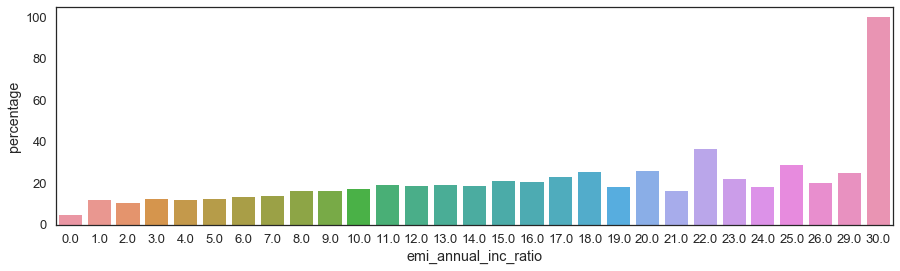

In [203]:
plt.figure(figsize=(15, 4))
#plt.figure(figsize=(8, 4))
sns.barplot(x = 'emi_annual_inc_ratio', y = 'percentage', data = loan_df_emi_ratio.loc[loan_df_emi_ratio.loan_status == 'Charged Off'])

In [204]:
loan_df['emi_annual_inc_ratio'].describe()
#the emi_annual_inc_ratio has some outilier. 

count    37433.000000
mean         6.535811
std          3.996540
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         32.000000
Name: emi_annual_inc_ratio, dtype: float64

In [205]:
#calculating the quantile for emi_annual_inc_ratio
print('1% quantile =' , loan_df.emi_annual_inc_ratio.quantile(q = 0.01))
print('99% quantile = ', loan_df.emi_annual_inc_ratio.quantile(q = 0.99))

1% quantile = 1.0
99% quantile =  18.0


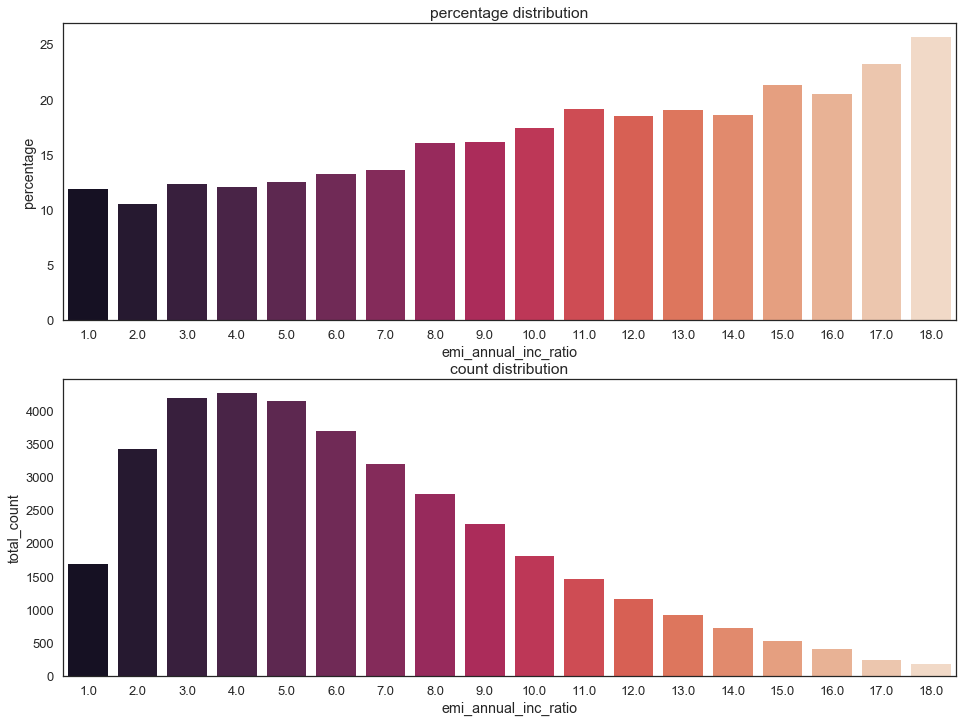

In [206]:
#Ploting the bar graph for emi_annual_inc_ratio..
plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
sns.barplot(palette="rocket", x = 'emi_annual_inc_ratio', y = 'percentage', data = loan_df_emi_ratio.loc[(loan_df_emi_ratio.loan_status == 'Charged Off') & (loan_df_emi_ratio.emi_annual_inc_ratio >= 1) & (loan_df_emi_ratio.emi_annual_inc_ratio <= 18)])
plt.title('percentage distribution')

plt.subplot(2, 1, 2)
sns.barplot(palette="rocket", x = 'emi_annual_inc_ratio', y = 'total_count', data = loan_df_emi_ratio.loc[(loan_df_emi_ratio.loan_status == 'Charged Off') & (loan_df_emi_ratio.emi_annual_inc_ratio >= 1) & (loan_df_emi_ratio.emi_annual_inc_ratio <= 18)])
plt.title('count distribution')

plt.show()

# charged off % is high for higher emi_annual_inc_ratio

In [207]:
# deriving the relationship between grade and emi_annual_inc_ratio.
# as the emi_annual_inc_ratio have some outliers .. So taking the median for every group.. 
loan_sub_grade_emi_ratio = pd.DataFrame({'median_emi_ratio': loan_df.loc[loan_df.loan_status == 'Charged Off'].groupby(['sub_grade'])['emi_annual_inc_ratio'].median()})
loan_sub_grade_emi_ratio.reset_index(inplace = True)
loan_sub_grade_emi_ratio.head()

,sub_grade,median_emi_ratio
0,A1,4.5
1,A2,6.0
2,A3,5.0
3,A4,5.0
4,A5,6.0


Text(0.5,1,'percentage distribution')

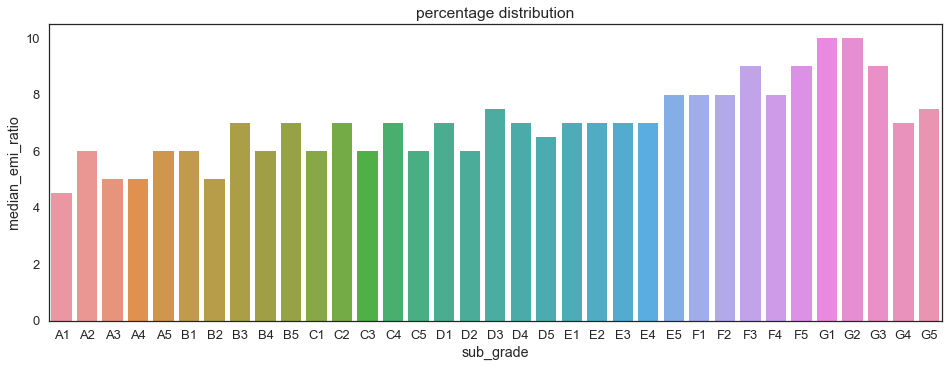

In [208]:
#ploting the bar graph for each sub-group..
plt.figure(figsize=(16,12))
plt.subplot(2, 1, 1)
sns.barplot(y = 'median_emi_ratio', x = 'sub_grade', data = loan_sub_grade_emi_ratio)
plt.title('percentage distribution')

# Lower the sub-grade higher the emi_annual_inc_ratio. Hence higher the charged off % loans..

<h3> loan_amnt_annual_inc_ratio

In [209]:
#loan_amount and anual_income..
loan_df['loan_amnt_annual_inc_ratio'] = round(100*loan_df['loan_amnt']/loan_df['annual_inc'])

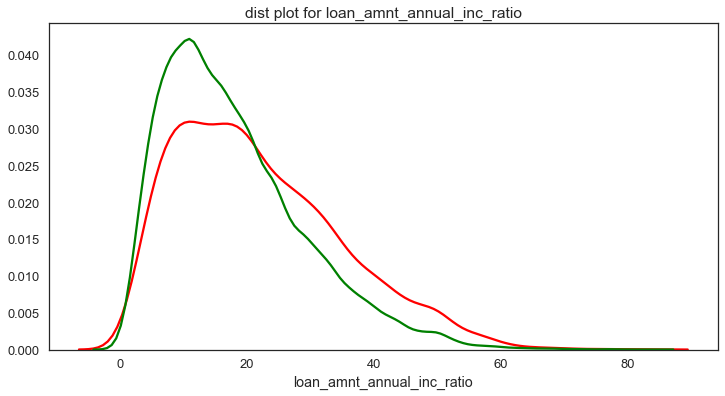

In [210]:
plt.figure(figsize=(12,6))
sns.distplot(loan_df.loc[loan_df.loan_status == 'Charged Off']['loan_amnt_annual_inc_ratio'], hist = False, color= 'red')
sns.distplot(loan_df.loc[loan_df.loan_status == 'Fully Paid']['loan_amnt_annual_inc_ratio'], hist = False, color = 'green')
plt.title('dist plot for loan_amnt_annual_inc_ratio')
plt.show()
# red lines are indicating the Charged Off loans and greens are indicating Fully Paid

# As the loan_amnt_annual_inc_ratio goes beyond 20 the probablity of being a loan charged off is much more higher.

<h2> <I> creating the type driven derived matrix from feature purpose, verification_status, inq_last_6mths, pub_rec, loan_status

In [211]:
loan_df_cat = pd.DataFrame({'count' : loan_df.groupby(['purpose', 'verification_status', 'inq_last_6mths', 'pub_rec', 'loan_status'])['id'].count()})
loan_df_cat_tot_count = pd.DataFrame({'tot_count' : loan_df.groupby(['purpose', 'verification_status', 'inq_last_6mths', 'pub_rec'])['id'].count()})
loan_df_cat.reset_index(inplace= True)
loan_df_cat_tot_count.reset_index(inplace = True)
loan_df_cat = pd.merge(loan_df_cat,loan_df_cat_tot_count, how = 'inner')
loan_df_cat['percentage'] = round(100* loan_df_cat['count'] / loan_df_cat['tot_count'], 2)
loan_df_cat.head()

,purpose,verification_status,inq_last_6mths,pub_rec,loan_status,count,tot_count,percentage
0,car,Not Verified,0,0,Charged Off,24,359,6.69
1,car,Not Verified,0,0,Fully Paid,335,359,93.31
2,car,Not Verified,0,1,Charged Off,2,15,13.33
3,car,Not Verified,0,1,Fully Paid,13,15,86.67
4,car,Not Verified,0,2,Fully Paid,2,2,100.00


In [212]:
loan_df_cat.loc[loan_df_cat.loan_status == 'Charged Off'].sort_values(by = 'percentage', ascending= False).head(5)

,purpose,verification_status,inq_last_6mths,pub_rec,loan_status,count,tot_count,percentage
778,wedding,Verified,7,0,Charged Off,1,1,100.0
439,medical,Not Verified,0,2,Charged Off,1,1,100.0
357,house,Source Verified,7,0,Charged Off,1,1,100.0
338,house,Not Verified,6,0,Charged Off,1,1,100.0
337,house,Not Verified,4,0,Charged Off,1,1,100.0


<h5> lot of bucket having low count. Thats making the percentage high.  

In [213]:
# describing the stastics for bucket count
loan_df_cat.loc[loan_df_cat.loan_status == 'Charged Off']['count'].describe()

count    326.000000
mean      16.322086
std       44.023252
min        1.000000
25%        1.000000
50%        3.000000
75%       12.000000
max      408.000000
Name: count, dtype: float64

this is having lot of outlier..

In [214]:
#taking the cuttoff count for % charged off analysis is 75% ..i.e 12
loan_df_cat_ = loan_df_cat.loc[(loan_df_cat.loan_status == 'Charged Off') & (loan_df_cat['count'] >= 12)]
loan_df_cat_.head()

,purpose,verification_status,inq_last_6mths,pub_rec,loan_status,count,tot_count,percentage
0,car,Not Verified,0,0,Charged Off,24,359,6.69
5,car,Not Verified,1,0,Charged Off,19,197,9.64
24,car,Source Verified,0,0,Charged Off,14,199,7.04
28,car,Source Verified,1,0,Charged Off,17,107,15.89
43,car,Verified,0,0,Charged Off,16,112,14.29


In [215]:
# top 10 bucker havaing the higher changed of percentage.. 
loan_df_cat_.sort_values(by = 'percentage', ascending= False).head(10)

,purpose,verification_status,inq_last_6mths,pub_rec,loan_status,count,tot_count,percentage
147,debt_consolidation,Not Verified,3,1,Charged Off,15,40,37.50
669,small_business,Verified,1,0,Charged Off,51,159,32.08
167,debt_consolidation,Source Verified,1,1,Charged Off,18,57,31.58
665,small_business,Verified,0,0,Charged Off,79,265,29.81
633,small_business,Not Verified,3,0,Charged Off,21,73,28.77
674,small_business,Verified,2,0,Charged Off,30,106,28.30
199,debt_consolidation,Verified,2,1,Charged Off,16,58,27.59
172,debt_consolidation,Source Verified,2,1,Charged Off,12,45,26.67
142,debt_consolidation,Not Verified,2,1,Charged Off,18,68,26.47
160,debt_consolidation,Source Verified,0,1,Charged Off,24,93,25.81


# Observation: the above combination is the top 10 combination of purpose, verification_status, inq_last_6mths,pub_rec, where the default percentage is high.. 

# creating the type driven derived matrix from feature annual_inc, dti, revol_util, total_pymnt, loan_amnt,int_rate_round, installment

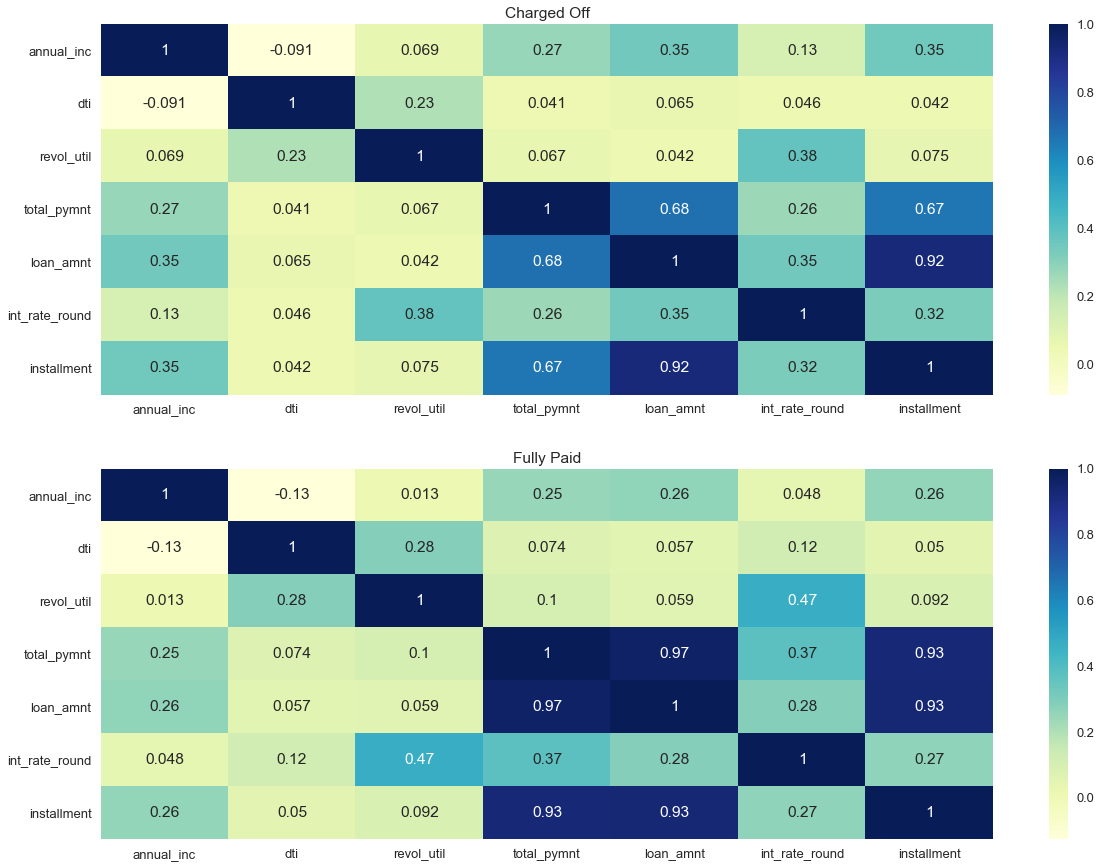

In [216]:
#pair plot for all the numerical variable..
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
loan_df_numerical = loan_df.loc[loan_df.loan_status == 'Charged Off'][['annual_inc', 'dti', 'revol_util', 'total_pymnt', 'loan_amnt', 'int_rate_round', 'installment']].corr()
sns.heatmap(loan_df_numerical, cmap="YlGnBu", annot=True)
plt.title("Charged Off")

plt.subplot(2, 1, 2)
loan_df_numerical = loan_df.loc[loan_df.loan_status == 'Fully Paid'][['annual_inc', 'dti', 'revol_util', 'total_pymnt', 'loan_amnt', 'int_rate_round', 'installment']].corr()
# pairplot
sns.heatmap(loan_df_numerical, cmap="YlGnBu", annot=True)
plt.title("Fully Paid")
plt.show()

# Total _amount and total_payment is highly corelated in  fully_paid loan. But not in charged_off.
# Total_payment and installment is also highly corelated in fully_paid loan.But not in charged_off. 